In [405]:
import pandas as pd 
import numpy as np 
import seaborn as sb 
import matplotlib.pyplot as plt

In [425]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv')

In [426]:
df.head(3).T

,0,1,2
Date,2008-12-01,2008-12-02,2008-12-03
Location,Albury,Albury,Albury
MinTemp,13.4,7.4,12.9
MaxTemp,22.9,25.1,25.7
Rainfall,0.6,0.0,0.0
Evaporation,NaN,NaN,NaN
Sunshine,NaN,NaN,NaN
WindGustDir,W,WNW,WSW
WindGustSpeed,44.0,44.0,46.0
WindDir9am,W,NNW,W


In [652]:
'rows:-',df.shape[0] ,'columns:-',df.shape[1]

('rows:-', 8425, 'columns:-', 23)

In [420]:
df['RainTomorrow']  ## target columns 

0        No
1        No
2        No
3        No
4        No
       ... 
8420     No
8421     No
8422     No
8423     No
8424    NaN
Name: RainTomorrow, Length: 8425, dtype: object

In [421]:
df.isnull().sum() # lots of null values we need to clean it 

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

In [13]:
for d in df.columns:
    print('\n','The unique values of',d,':-',df[d].unique())


 The unique values of Date :- ['2008-12-01' '2008-12-02' '2008-12-03' ... '2013-06-06' '2013-06-07'
 '2013-06-08']

 The unique values of Location :- ['Albury' 'CoffsHarbour' 'Newcastle' 'Penrith' 'Williamtown' 'Wollongong'
 'Melbourne' 'Brisbane' 'Adelaide' 'PerthAirport' 'Darwin' 'Uluru']

 The unique values of MinTemp :- [13.4  7.4 12.9  9.2 17.5 14.6 14.3  7.7  9.7 13.1 15.9 12.6  8.4  9.8
 14.1 13.5 11.2 11.5 17.1 20.5 15.3 16.2 16.9 20.1 19.7 12.5 12.  11.3
  9.6 10.5 12.3 13.7 16.1 14.  17.  17.3 17.2 17.4 19.8 14.9 13.9 18.6
 19.3 24.4 18.8 20.8 15.7 18.5 20.4 21.8 22.3 22.  28.  21.5 21.7 23.5
 28.3 18.4 12.4 13.3 18.  18.7 15.5  8.9 15.  15.4 16.  12.8 13.2 13.8
  7.6  8.3 11.  20.9 16.4 10.   8.8  9.3 14.4 10.8 10.1  9.1 10.4 12.2
 10.7  7.8  8.1  7.5  8.2 11.6 13.   9.9  3.5  6.6  7.   5.7  6.2  6.
 10.6  8.6  4.5  5.4  2.1  1.8  7.2  4.6  4.2  5.2  4.1  3.2  4.3  3.7
  3.6  6.9 10.3  3.   2.6  5.1  4.4  4.7  6.7  8.   2.2  1.7  2.8  9.
  6.3 -2.  -1.3  2.   0.5  1.2  0.6 

In [76]:
## Removing null values in target columns 

In [653]:
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

In [654]:
yes_rain = df[df['RainTomorrow']=='Yes']
no_rain = df[df['RainTomorrow']=='No']

In [655]:
yes_rain.shape,no_rain.shape

((1991, 23), (6195, 23))

### some of these columns are used for fillnull value for mode


In [656]:
yes_rain['MinTemp'].fillna(yes_rain['MinTemp'].mode()[0],inplace=True)
no_rain['MinTemp'].fillna(no_rain['MinTemp'].mode()[0],inplace=True)

yes_rain['MaxTemp'].fillna(yes_rain['MaxTemp'].mode()[0],inplace=True)
no_rain['MaxTemp'].fillna(no_rain['MaxTemp'].mode()[0],inplace=True)

yes_rain['Temp9am'].fillna(yes_rain['Temp9am'].mode()[0],inplace=True)
no_rain['Temp9am'].fillna(no_rain['Temp9am'].mode()[0],inplace=True)

yes_rain['Temp3pm'].fillna(yes_rain['Temp3pm'].mode()[0],inplace=True)
no_rain['Temp3pm'].fillna(no_rain['Temp3pm'].mode()[0],inplace=True)


yes_rain['Humidity3pm'].fillna(yes_rain['Humidity3pm'].mode()[0],inplace=True)
no_rain['Humidity3pm'].fillna(no_rain['Humidity3pm'].mode()[0],inplace=True)

yes_rain['Humidity9am'].fillna(yes_rain['Humidity9am'].mode()[0],inplace=True)
no_rain['Humidity9am'].fillna(no_rain['Humidity9am'].mode()[0],inplace=True)

### some of these are fillna values with median

In [657]:
yes_rain['Sunshine'].fillna(yes_rain['Sunshine'].median(),inplace=True)
no_rain['Sunshine'].fillna(no_rain['Sunshine'].median(),inplace=True)

yes_rain['Evaporation'].fillna(yes_rain['Evaporation'].median(),inplace=True)
no_rain['Evaporation'].fillna(no_rain['Evaporation'].median(),inplace=True)

yes_rain['Cloud3pm'].fillna(yes_rain['Cloud3pm'].median(),inplace=True)
no_rain['Cloud3pm'].fillna(no_rain['Cloud3pm'].median(),inplace=True)

yes_rain['Cloud9am'].fillna(yes_rain['Cloud9am'].median(),inplace=True)
no_rain['Cloud9am'].fillna(no_rain['Cloud9am'].median(),inplace=True)

yes_rain['Pressure3pm'].fillna(yes_rain['Pressure3pm'].median(),inplace=True)
no_rain['Pressure3pm'].fillna(no_rain['Pressure3pm'].median(),inplace=True)

yes_rain['Pressure9am'].fillna(yes_rain['Pressure9am'].median(),inplace=True)
no_rain['Pressure9am'].fillna(no_rain['Pressure9am'].median(),inplace=True)

yes_rain['WindGustDir'].fillna(yes_rain['WindGustDir'].mode()[0],inplace=True)
no_rain['WindGustDir'].fillna(no_rain['WindGustDir'].mode()[0],inplace=True)

yes_rain['WindGustSpeed'].fillna(yes_rain['WindGustSpeed'].median(),inplace=True)
no_rain['WindGustSpeed'].fillna(no_rain['WindGustSpeed'].median(),inplace=True)

yes_rain['WindDir9am'].fillna(yes_rain['WindDir9am'].mode()[0],inplace=True)
no_rain['WindDir9am'].fillna(no_rain['WindDir9am'].mode()[0],inplace=True)

yes_rain['WindDir3pm'].fillna(yes_rain['WindDir3pm'].mode()[0],inplace=True)
no_rain['WindDir3pm'].fillna(no_rain['WindDir3pm'].mode()[0],inplace=True)

yes_rain['WindSpeed3pm'].fillna(yes_rain['WindSpeed3pm'].median(),inplace=True)
no_rain['WindSpeed3pm'].fillna(no_rain['WindSpeed3pm'].median(),inplace=True)

yes_rain['WindSpeed9am'].fillna(yes_rain['WindSpeed9am'].median(),inplace=True)
no_rain['WindSpeed9am'].fillna(no_rain['WindSpeed9am'].median(),inplace=True)



yes_rain['Rainfall'].fillna(yes_rain['Rainfall'].median(),inplace=True)
no_rain['Rainfall'].fillna(no_rain['Rainfall'].median(),inplace=True)

In [658]:
ddf=pd.concat([yes_rain,no_rain],join='inner',axis=0).reset_index()

In [659]:
ddf.drop('index',axis=1,inplace=True)

In [660]:
ddf['RainTomorrow'].isnull().sum()

0

In [668]:
ddf['RainToday'].isnull().sum()


0

In [599]:
ddf['RainToday'].dtype


dtype('O')

In [665]:
ind2=ddf.loc[ddf['RainToday'].isnull()].index
ddf.drop(index=ind2,axis=0,inplace=True)


In [676]:
ddf.drop(['index','level_0'],axis=1,inplace=True)


In [677]:
ddf

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-09,Albury,9.7,31.9,0.0,3.8,4.2,NNW,80.0,SE,...,42.0,9.0,1008.9,1003.6,7.0,7.0,18.3,30.2,No,Yes
1,2008-12-11,Albury,13.4,30.4,0.0,3.8,4.2,N,30.0,SSE,...,48.0,22.0,1011.8,1008.7,7.0,7.0,20.4,28.8,No,Yes
2,2008-12-12,Albury,15.9,21.7,2.2,3.8,4.2,NNE,31.0,NE,...,89.0,91.0,1010.5,1004.2,8.0,8.0,15.9,17.0,Yes,Yes
3,2008-12-13,Albury,15.9,18.6,15.6,3.8,4.2,W,61.0,NNW,...,76.0,93.0,994.3,993.0,8.0,8.0,17.4,15.8,Yes,Yes
4,2008-12-17,Albury,14.1,20.9,0.0,3.8,4.2,ENE,22.0,SSW,...,69.0,82.0,1012.2,1010.4,8.0,1.0,17.2,18.1,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8074,2017-06-20,Uluru,3.5,21.8,0.0,4.8,9.6,E,31.0,ESE,...,59.0,27.0,1024.7,1021.2,4.0,4.0,9.4,20.9,No,No
8075,2017-06-21,Uluru,2.8,23.4,0.0,4.8,9.6,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,4.0,4.0,10.1,22.4,No,No
8076,2017-06-22,Uluru,3.6,25.3,0.0,4.8,9.6,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,4.0,4.0,10.9,24.5,No,No
8077,2017-06-23,Uluru,5.4,26.9,0.0,4.8,9.6,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,4.0,4.0,12.5,26.1,No,No


In [678]:
ddf.isnull().sum() ## no null values 

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [679]:
ddf.shape

(8079, 23)

<AxesSubplot:>

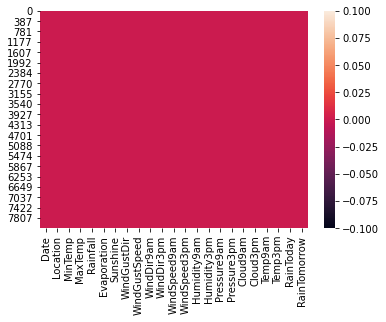

In [603]:
# using heatmap to for better analysis
sb.heatmap(ddf.isnull())

## no null values here 

# EDA

In [604]:
categ=[]
conti=[]

In [605]:
#categorical_columns
for d in ddf.columns:
    if ddf[d].dtype=='object':
        categ.append(d)
    else :
        ddf[d].dtype!='object'
        conti.append(d)

In [606]:
categ 


['Date',
 'Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [607]:
conti

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

In [687]:
categorical=df[['Date','Location','WindGustDir','WindDir9am','WindDir3pm','RainToday','RainTomorrow']]
continous  = df[['MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm']]

B:\i new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Location', ylabel='count'>

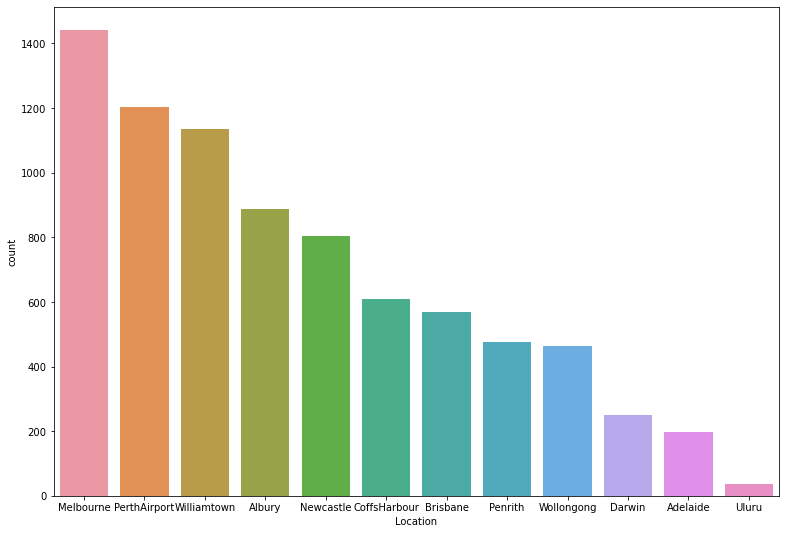

In [172]:
plt.figure(figsize=(13,9))
sb.countplot(df['Location'],order=df['Location'].value_counts().index)

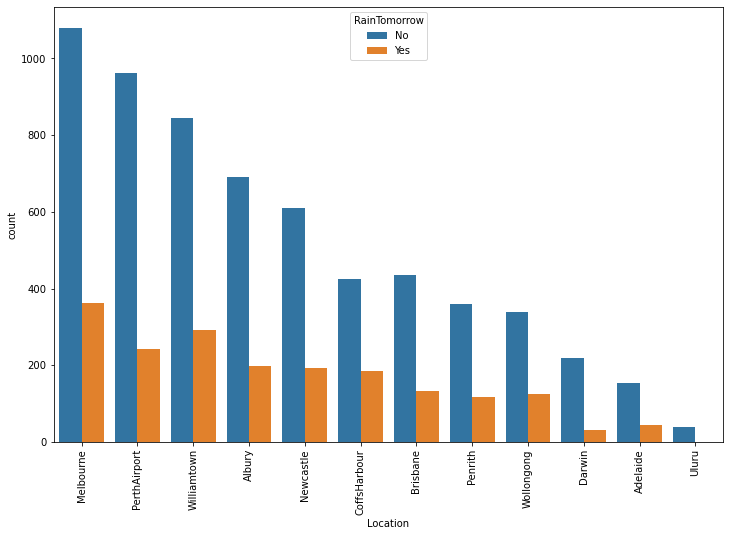

In [179]:
plt.figure(figsize=(12,8))
sb.countplot(df['Location'],order=df['Location'].value_counts().index,hue=df['RainTomorrow'])
plt.xticks(rotation=90)
plt.show()

## WindDir9am and WindDir3pm grouped by value

In [199]:
p=df.groupby([ 'WindDir9am', 'WindDir3pm'])['Date'].count().unstack()

In [200]:
p

WindDir3pm,E,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
WindDir9am,,,,,,,,,,,,,,,,
E,64,47,52,11,21,8,9,14,12,29,18,8,22,18,12,23
ENE,56,58,24,23,50,24,17,15,14,27,18,13,26,21,12,26
ESE,42,23,40,13,7,11,3,10,14,30,12,5,16,9,2,7
N,20,21,4,227,52,89,73,72,36,14,28,23,28,53,60,38
NE,16,32,12,39,59,36,24,27,18,34,6,1,15,23,16,26
NNE,25,29,13,58,55,45,25,23,11,4,3,7,17,30,29,39
NNW,13,10,7,21,28,21,28,25,4,9,7,3,5,20,33,24
NW,16,13,32,16,43,33,24,90,18,69,25,10,27,30,69,33
S,15,15,28,7,10,5,16,5,73,37,54,32,29,14,10,23


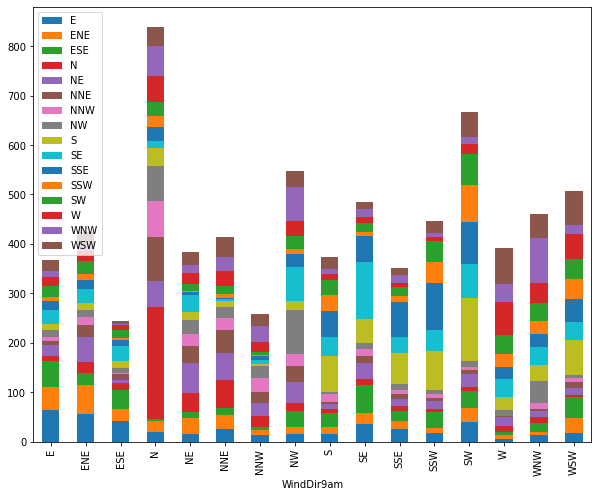

In [202]:
fig,ax=plt.subplots()
p.plot(kind='bar',figsize=(10,8),ax=ax,stacked=True)
ax.legend(loc='best')


In [207]:
categorical.columns

Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm',
       'RainToday', 'RainTomorrow'],
      dtype='object')

## RainToday and WindDir9am

In [217]:
v=df.groupby(['RainToday', 'WindDir9am'])['Date'].count().unstack()
k=v.div(v.sum()).T

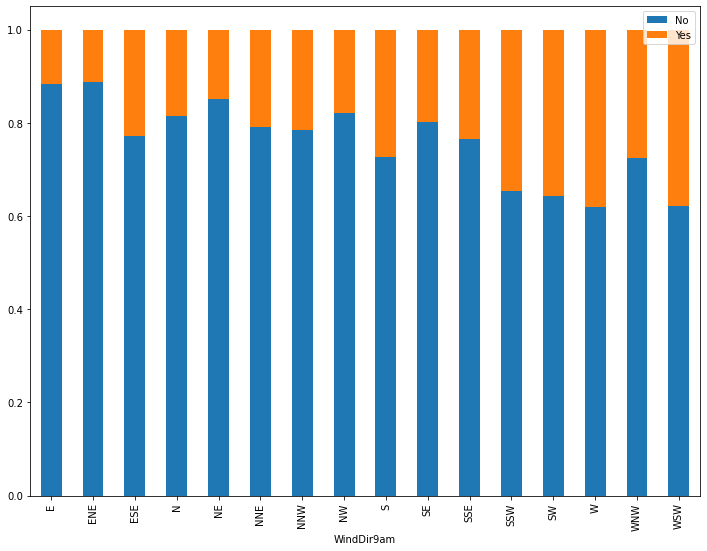

In [219]:
fig,ax=plt.subplots()
k.plot(kind='bar',figsize=(12,9),ax=ax,stacked=True)
ax.legend(loc='best')


### RainToday and  WindDir3pm

In [227]:
c=df.groupby(['RainToday', 'WindDir3pm'])['Date'].count().unstack()
t=c.div(v.sum()).T

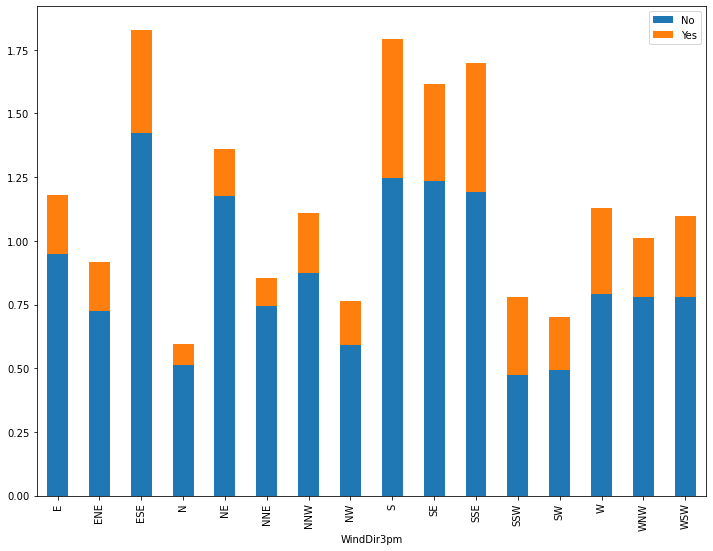

In [228]:
fig,ax=plt.subplots()
t.plot(kind='bar',figsize=(12,9),ax=ax,stacked=True)
ax.legend(loc='best')

### RainTomorrow and WindDir3pm

In [231]:
c=df.groupby(['RainTomorrow', 'WindDir3pm'])['Date'].count().unstack()
t=c.div(v.sum()).T

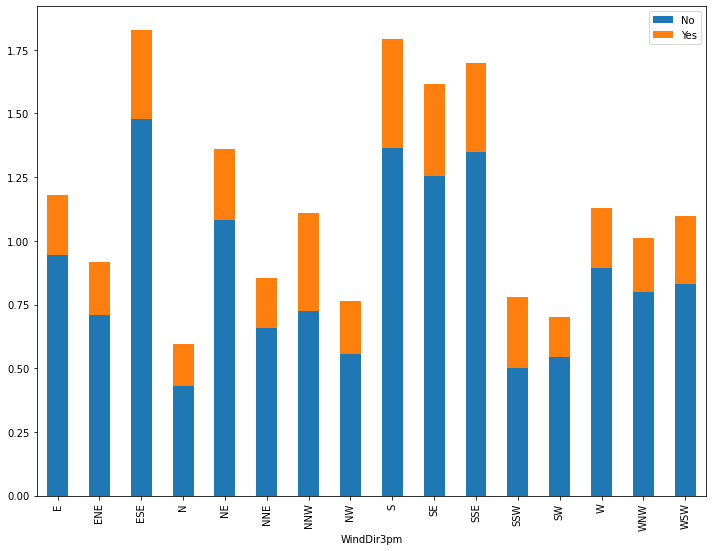

In [232]:
fig,ax=plt.subplots()
t.plot(kind='bar',figsize=(12,9),ax=ax,stacked=True)
ax.legend(loc='best')

### RainTomorrow and WindDir9am

In [233]:
c=df.groupby(['RainTomorrow', 'WindDir9am'])['Date'].count().unstack()
t=c.div(v.sum()).T

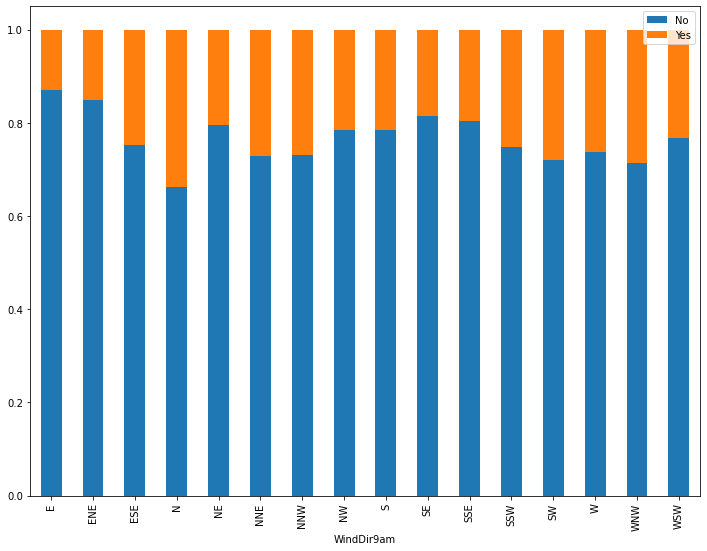

In [234]:
fig,ax=plt.subplots()
t.plot(kind='bar',figsize=(12,9),ax=ax,stacked=True)
ax.legend(loc='best')

## mintemp

<AxesSubplot:xlabel='MinTemp', ylabel='MaxTemp'>

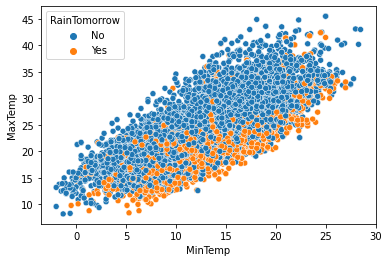

In [180]:
sb.scatterplot(df['MinTemp'],df['MaxTemp'],hue='RainTomorrow',data=df)

### Sunshine and Sunshine

<AxesSubplot:xlabel='Sunshine', ylabel='Evaporation'>

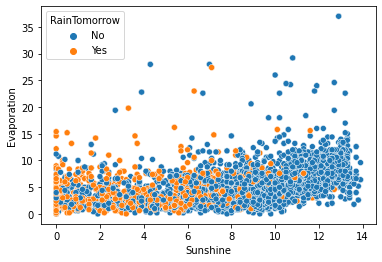

In [181]:
sb.scatterplot(df['Sunshine'],df['Evaporation'],hue='RainTomorrow',data=df)

### WindGustSpeed and WindGustDir

<AxesSubplot:xlabel='WindGustSpeed', ylabel='WindGustDir'>

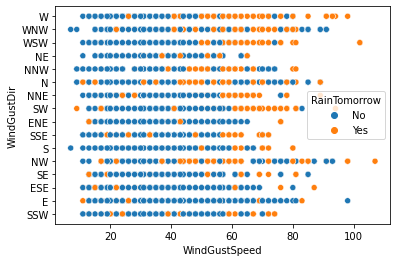

In [182]:
sb.scatterplot(df['WindGustSpeed'],df['WindGustDir'],hue='RainTomorrow',data=df)

### WindSpeed9am and WindDir9am

<AxesSubplot:xlabel='WindDir9am', ylabel='WindSpeed9am'>

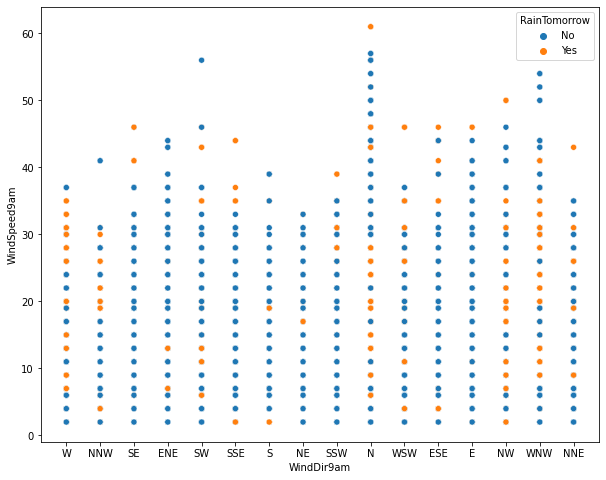

In [236]:
plt.figure(figsize=(10,8))
sb.scatterplot(y=df['WindSpeed9am'],x=df['WindDir9am'],hue='RainTomorrow',data=df)

In [185]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

### Humidity3pm,Humidity9am and RainTomorrow

<AxesSubplot:xlabel='Humidity3pm', ylabel='Humidity9am'>

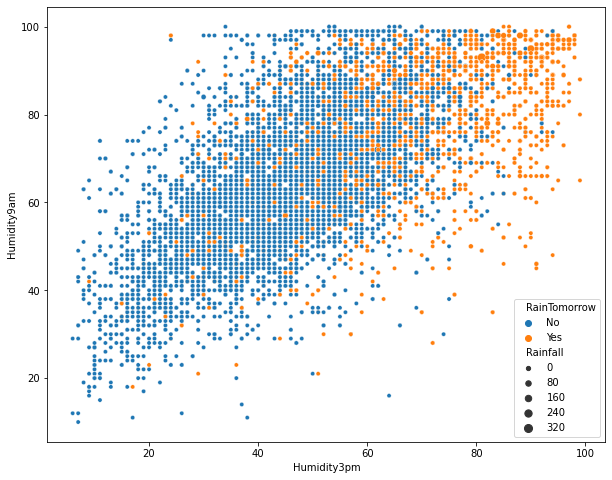

In [191]:
plt.figure(figsize=(10,8))
sb.scatterplot(df['Humidity3pm'],df['Humidity9am'],hue='RainTomorrow',size='Rainfall',data=df)

In [ ]:
Pressure3pm, Pressure9am and RainTomorrow

<AxesSubplot:xlabel='Pressure3pm', ylabel='Pressure9am'>

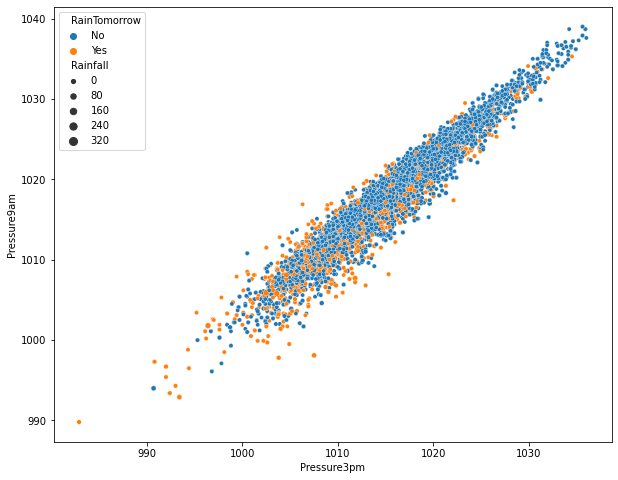

In [190]:
plt.figure(figsize=(10,8))
sb.scatterplot(df['Pressure3pm'],df['Pressure9am'],hue='RainTomorrow',size='Rainfall',data=df)

### Cloud3pm,Cloud9am and RainTomorrow

<AxesSubplot:xlabel='Cloud3pm', ylabel='Cloud9am'>

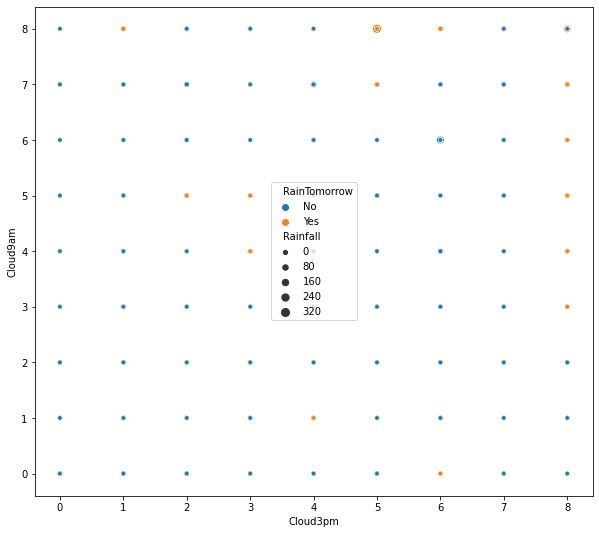

In [237]:
plt.figure(figsize=(10,9))
sb.scatterplot(df['Cloud3pm'],df['Cloud9am'],hue='RainTomorrow',size='Rainfall',data=df)

## Temp3pm ,Temp9am and RainTomorrow

<AxesSubplot:xlabel='Temp3pm', ylabel='Temp9am'>

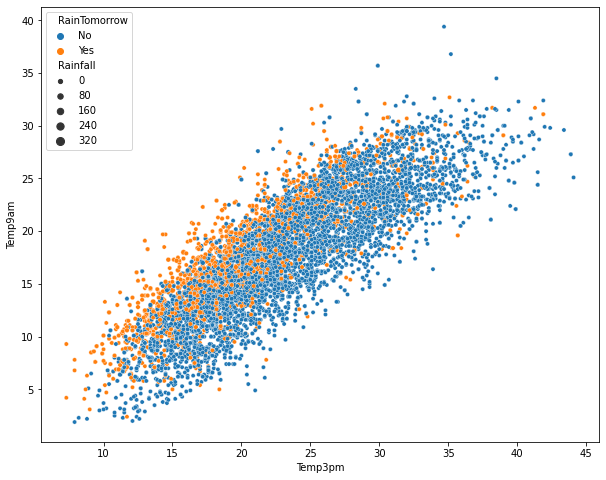

In [193]:
plt.figure(figsize=(10,8))
sb.scatterplot(df['Temp3pm'],df['Temp9am'],hue='RainTomorrow',size='Rainfall',data=df)

### RainToday and RainTomorrow

In [242]:
g=df.groupby(['RainToday','RainTomorrow'])['Date'].count().unstack()
u=g.div(g.sum()).T

<AxesSubplot:xlabel='RainTomorrow'>

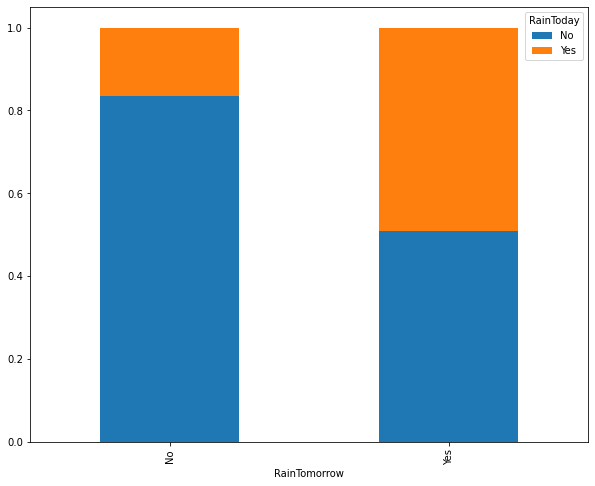

In [245]:
u.plot(kind='bar',stacked=True,figsize=(10,8))

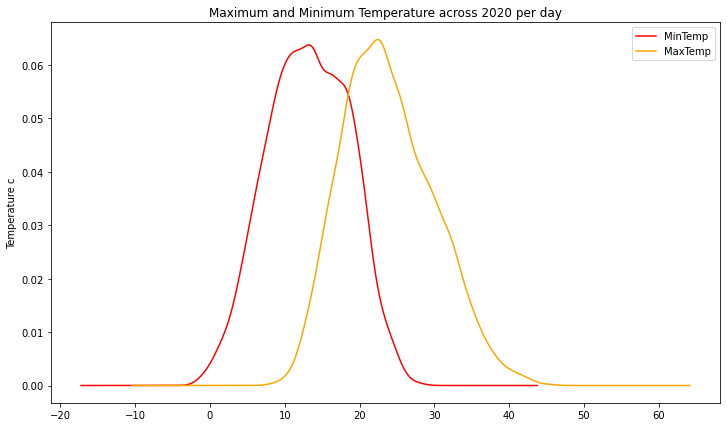

In [252]:
max_temp = df['MaxTemp']
min_temp = df['MinTemp']

min_temp.plot(figsize=(12,7),color='r', legend=True,kind='kde')
max_temp.plot(figsize=(12,7), color='orange', legend=True,kind='kde')
plt.title('Maximum and Minimum Temperature across 2020 per day')
plt.ylabel('Temperature c')
plt.show()

# Plotting for continous columns 

In [260]:
continous.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8079 entries, 0 to 8423
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        8031 non-null   float64
 1   MaxTemp        8045 non-null   float64
 2   Rainfall       8079 non-null   float64
 3   Evaporation    4702 non-null   float64
 4   Sunshine       4240 non-null   float64
 5   WindGustSpeed  7134 non-null   float64
 6   WindSpeed9am   8030 non-null   float64
 7   WindSpeed3pm   7996 non-null   float64
 8   Humidity9am    8043 non-null   float64
 9   Humidity3pm    7999 non-null   float64
 10  Pressure9am    6794 non-null   float64
 11  Pressure3pm    6793 non-null   float64
 12  Cloud9am       5872 non-null   float64
 13  Cloud3pm       5832 non-null   float64
 14  Temp9am        8046 non-null   float64
 15  Temp3pm        8005 non-null   float64
dtypes: float64(16)
memory usage: 1.3 MB


# skewness

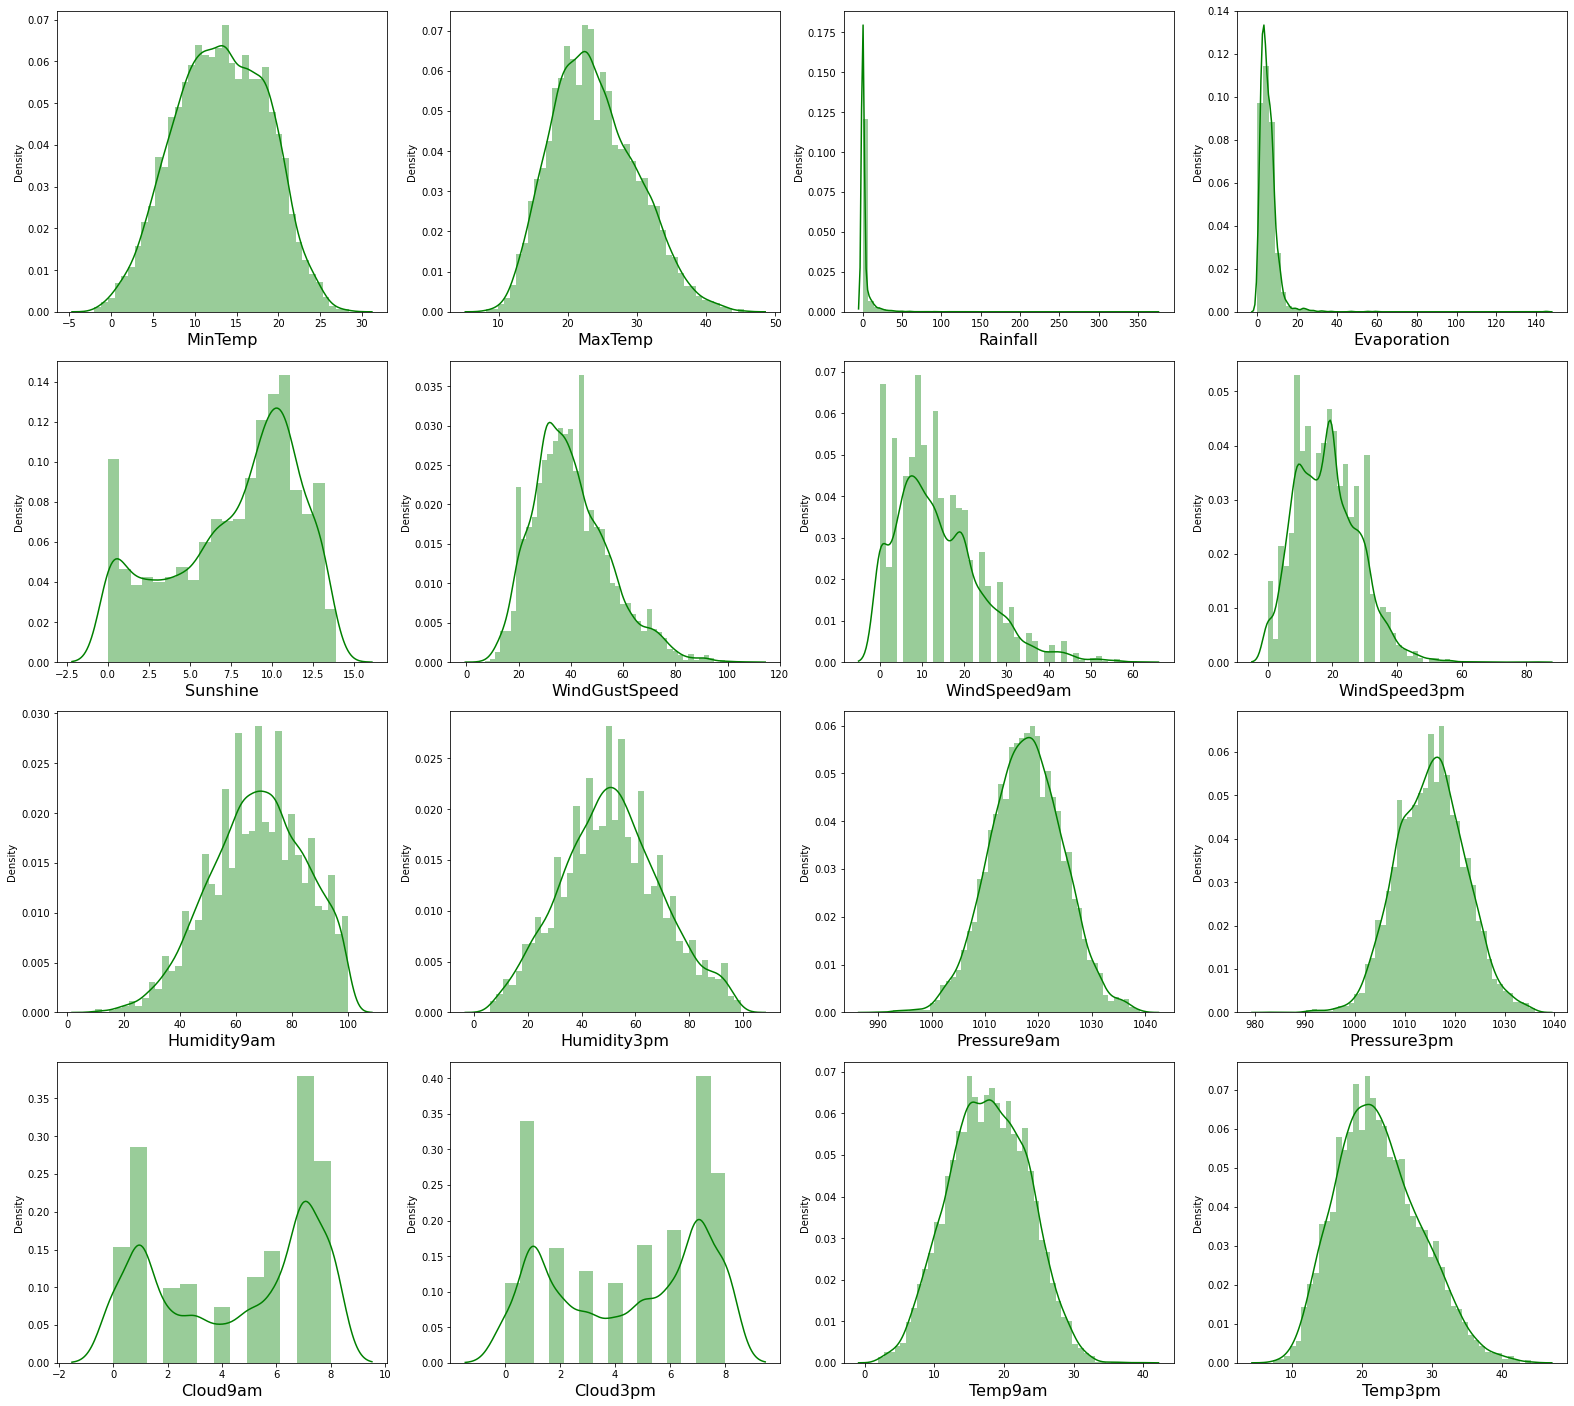

In [261]:
plt.figure(figsize=(22,24))
num=1

for columns in continous:
    
    if num<=20:
        ax=plt.subplot(5,4,num)
        sb.distplot(continous[columns],color='g')
        plt.xlabel(columns,fontsize=16)
        
    num+=1
plt.tight_layout()

as i see that rainfall and evaporation are skwead in nature.Although we need to rectify the data 

# outliers 

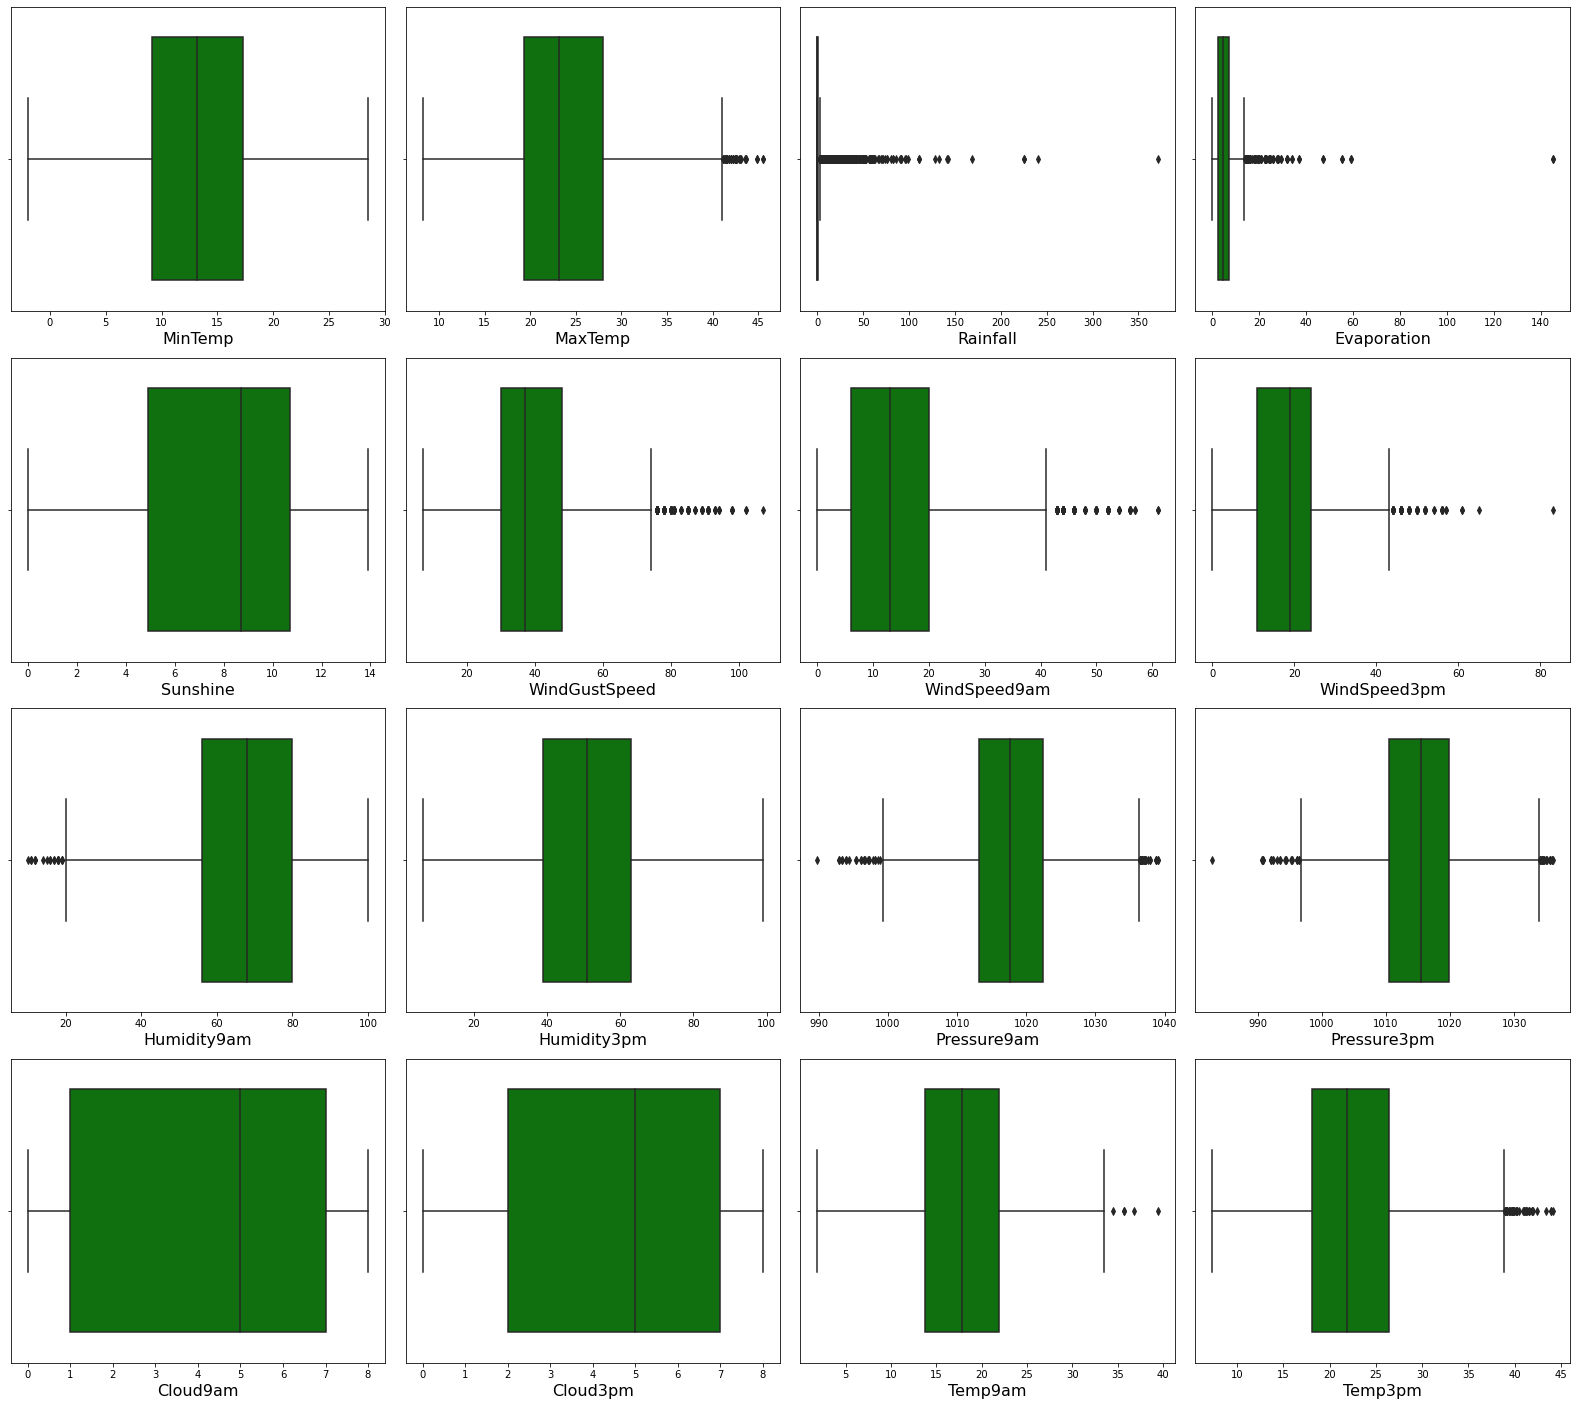

In [264]:
plt.figure(figsize=(22,24))
num=1

for columns in continous:
    
    if num<=20:
        ax=plt.subplot(5,4,num)
        sb.boxplot(continous[columns],color='g')
        plt.xlabel(columns,fontsize=16)
        
    num+=1
plt.tight_layout()

- some of columns rainfall and evaportion shows lots of outliers 
- also windspeed 9am and weend speed 3pm 
- some of are also in pressure 9am to pressure 3am
- and  very few in temp9am and some of temp3pm

In [345]:
len(df.columns)

25

# Feature engineering 

In [609]:
from sklearn.preprocessing import LabelEncoder

In [680]:
ddf.columns


Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [681]:
ddf['Date']=pd.to_datetime(ddf['Date'])
ddf['Date']

0      2008-12-09
1      2008-12-11
2      2008-12-12
3      2008-12-13
4      2008-12-17
          ...    
8074   2017-06-20
8075   2017-06-21
8076   2017-06-22
8077   2017-06-23
8078   2017-06-24
Name: Date, Length: 8079, dtype: datetime64[ns]

In [682]:
ddf['year']=ddf['Date'].dt.year

In [683]:
ddf['month']=ddf['Date'].dt.month

In [684]:
ddf['day']=ddf['Date'].dt.day

In [685]:
ddf.drop('Date',axis=1,inplace=True)

In [686]:
ddf.sample()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
3412,Newcastle,17.8,31.2,0.0,4.8,9.6,N,37.0,NE,S,...,1016.0,8.0,3.0,24.0,24.0,No,No,2014,10,7


In [690]:
categorical.shape

(8425, 7)

### using label Encoder

In [691]:
from sklearn.preprocessing import LabelEncoder

In [692]:
le=LabelEncoder()

In [693]:
ddf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8079 entries, 0 to 8078
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       8079 non-null   object 
 1   MinTemp        8079 non-null   float64
 2   MaxTemp        8079 non-null   float64
 3   Rainfall       8079 non-null   float64
 4   Evaporation    8079 non-null   float64
 5   Sunshine       8079 non-null   float64
 6   WindGustDir    8079 non-null   object 
 7   WindGustSpeed  8079 non-null   float64
 8   WindDir9am     8079 non-null   object 
 9   WindDir3pm     8079 non-null   object 
 10  WindSpeed9am   8079 non-null   float64
 11  WindSpeed3pm   8079 non-null   float64
 12  Humidity9am    8079 non-null   float64
 13  Humidity3pm    8079 non-null   float64
 14  Pressure9am    8079 non-null   float64
 15  Pressure3pm    8079 non-null   float64
 16  Cloud9am       8079 non-null   float64
 17  Cloud3pm       8079 non-null   float64
 18  Temp9am 

In [694]:
ddf['RainToday']=le.fit_transform(ddf['RainToday'])
ddf['RainTomorrow']=le.fit_transform(ddf['RainTomorrow'])
ddf['WindDir3pm']=le.fit_transform(ddf['WindDir3pm'])
ddf['WindDir9am']=le.fit_transform(ddf['WindDir9am'])
ddf['WindGustDir']=le.fit_transform(ddf['WindGustDir'])
ddf['Location']=le.fit_transform(ddf['Location'])

In [695]:
ddf.info() ## all columns are in integer or float ,thats good thing we need to remove outliers also.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8079 entries, 0 to 8078
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       8079 non-null   int32  
 1   MinTemp        8079 non-null   float64
 2   MaxTemp        8079 non-null   float64
 3   Rainfall       8079 non-null   float64
 4   Evaporation    8079 non-null   float64
 5   Sunshine       8079 non-null   float64
 6   WindGustDir    8079 non-null   int32  
 7   WindGustSpeed  8079 non-null   float64
 8   WindDir9am     8079 non-null   int32  
 9   WindDir3pm     8079 non-null   int32  
 10  WindSpeed9am   8079 non-null   float64
 11  WindSpeed3pm   8079 non-null   float64
 12  Humidity9am    8079 non-null   float64
 13  Humidity3pm    8079 non-null   float64
 14  Pressure9am    8079 non-null   float64
 15  Pressure3pm    8079 non-null   float64
 16  Cloud9am       8079 non-null   float64
 17  Cloud3pm       8079 non-null   float64
 18  Temp9am 

# CORRELATION 

In [374]:
df.corr()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,year,month,day
MinTemp,1.000000,0.720189,0.091696,0.340787,0.074181,0.239741,0.139624,0.182400,-0.132139,0.083842,-0.463013,-0.455263,0.108024,0.047700,0.889077,0.688760,0.029776,-0.266662,0.007764
MaxTemp,0.720189,1.000000,-0.088677,0.418112,0.521908,0.142850,0.014941,0.091320,-0.393789,-0.422224,-0.342441,-0.423387,-0.311985,-0.303292,0.868072,0.978289,0.105715,-0.180980,0.013428
Rainfall,0.091696,-0.088677,1.000000,0.044072,-0.209281,0.105080,0.051508,0.026120,0.230665,0.238184,-0.080555,-0.037402,0.195701,0.159181,-0.007155,-0.091832,0.006215,-0.011746,-0.016931
Evaporation,0.340787,0.418112,0.044072,1.000000,0.344922,0.214654,0.177051,0.147230,-0.283945,-0.220625,-0.214851,-0.229689,-0.081481,-0.152928,0.396703,0.407954,0.257717,0.005446,0.012271
Sunshine,0.074181,0.521908,-0.209281,0.344922,1.000000,-0.015920,-0.018725,0.043505,-0.513189,-0.631561,0.025428,-0.050289,-0.704569,-0.724569,0.345915,0.545035,0.143934,-0.001873,-0.003602
WindGustSpeed,0.239741,0.142850,0.105080,0.214654,-0.015920,1.000000,0.657985,0.714721,-0.291990,-0.094198,-0.424416,-0.389262,0.026642,0.104060,0.209772,0.102489,-0.051500,0.044818,-0.000566
WindSpeed9am,0.139624,0.014941,0.051508,0.177051,-0.018725,0.657985,1.000000,0.570410,-0.362720,-0.111868,-0.192224,-0.154268,-0.003336,0.066474,0.111576,-0.001891,-0.089831,0.033268,-0.002612
WindSpeed3pm,0.182400,0.091320,0.026120,0.147230,0.043505,0.714721,0.570410,1.000000,-0.260240,-0.090605,-0.290198,-0.241301,0.004942,0.007318,0.189720,0.067938,-0.060018,0.042553,-0.009536
Humidity9am,-0.132139,-0.393789,0.230665,-0.283945,-0.513189,-0.291990,-0.362720,-0.260240,1.000000,0.635446,0.159437,0.194141,0.472425,0.353491,-0.378514,-0.383875,0.102961,-0.118715,0.001864
Humidity3pm,0.083842,-0.422224,0.238184,-0.220625,-0.631561,-0.094198,-0.111868,-0.090605,0.635446,1.000000,-0.002038,0.072454,0.513150,0.522415,-0.126122,-0.490128,-0.027712,-0.074234,0.012911


<AxesSubplot:>

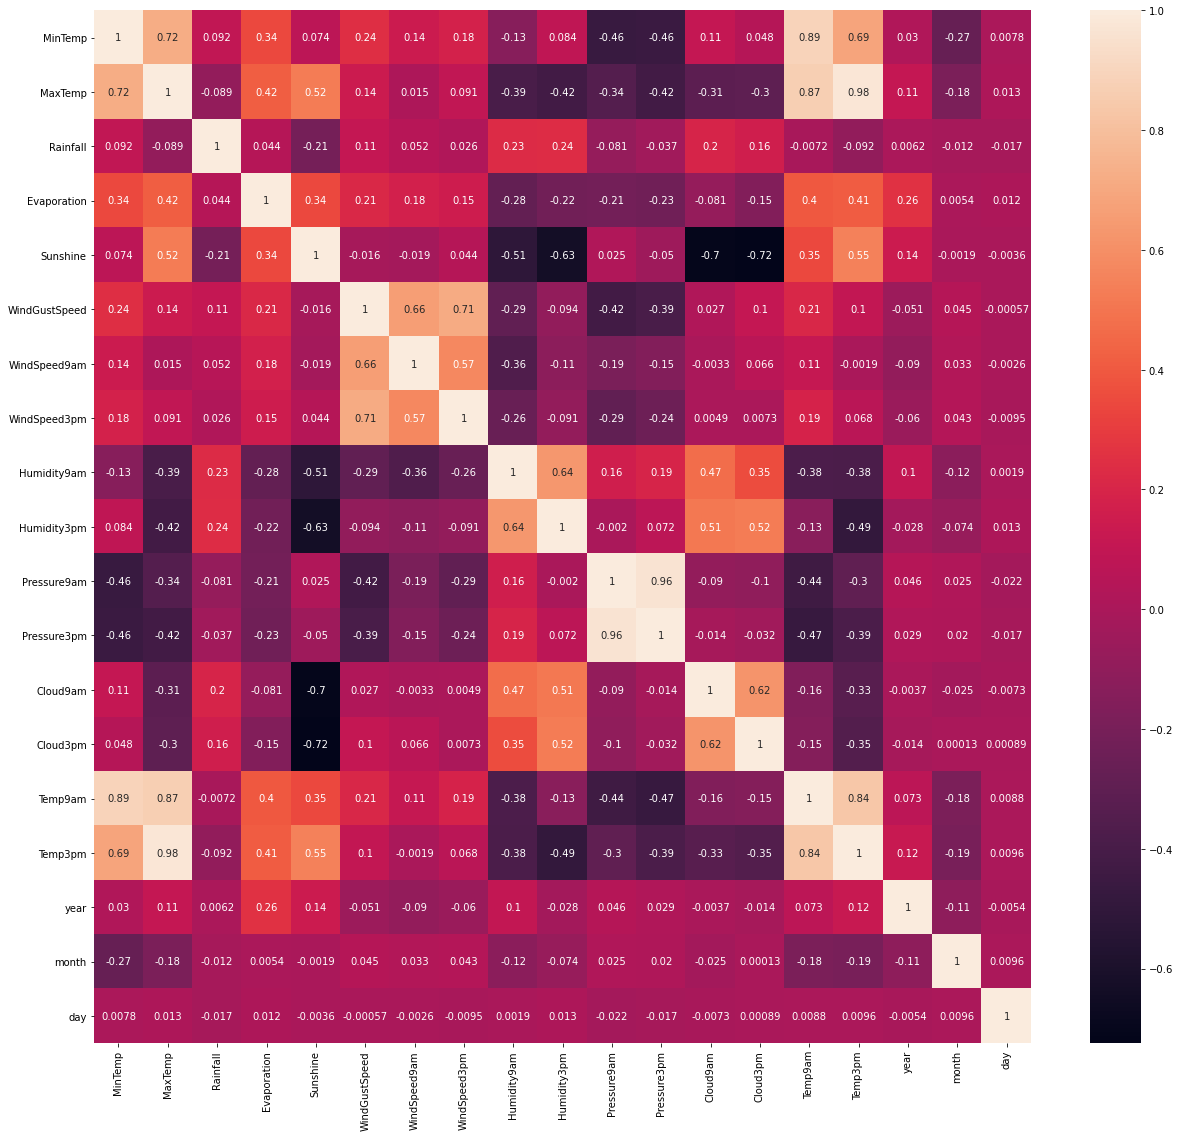

In [378]:
## keeping thresh hold lim it >= 0.90
plt.figure(figsize=(21,19))
sb.heatmap(df.corr(),annot=True,fmt='.2g')

- In plotted heatmap , we see maxtemp and temp3am showing the 98% of correlation which is multicolinearity
- Although, there are also some values shown but non of them cross the thresh hold limit 



# Removing Skewness and outliers

In [494]:
ddf

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,1,9.7,31.9,0.0,3.8,4.2,6,80.0,9,7,...,1003.6,7.0,7.0,18.3,30.2,0,1,2008,12,9
1,1,13.4,30.4,0.0,3.8,4.2,3,30.0,10,2,...,1008.7,7.0,7.0,20.4,28.8,0,1,2008,12,11
2,1,15.9,21.7,2.2,3.8,4.2,5,31.0,4,1,...,1004.2,8.0,8.0,15.9,17.0,1,1,2008,12,12
3,1,15.9,18.6,15.6,3.8,4.2,13,61.0,6,6,...,993.0,8.0,8.0,17.4,15.8,1,1,2008,12,13
4,1,14.1,20.9,0.0,3.8,4.2,1,22.0,11,0,...,1010.4,8.0,1.0,17.2,18.1,0,1,2008,12,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8181,9,3.5,21.8,0.0,4.8,9.6,0,31.0,2,0,...,1021.2,4.0,4.0,9.4,20.9,0,0,2017,6,20
8182,9,2.8,23.4,0.0,4.8,9.6,0,31.0,9,1,...,1020.3,4.0,4.0,10.1,22.4,0,0,2017,6,21
8183,9,3.6,25.3,0.0,4.8,9.6,6,22.0,9,3,...,1019.1,4.0,4.0,10.9,24.5,0,0,2017,6,22
8184,9,5.4,26.9,0.0,4.8,9.6,3,37.0,9,14,...,1016.8,4.0,4.0,12.5,26.1,0,0,2017,6,23


In [496]:
## first checking the continous columns here

In [498]:
continous=pd.DataFrame()

In [499]:
continous=ddf[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm','Temp9am', 'Temp3pm']]

In [500]:
continous

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,9.7,31.9,0.0,3.8,4.2,80.0,7.0,28.0,42.0,9.0,1008.9,1003.6,7.0,7.0,18.3,30.2
1,13.4,30.4,0.0,3.8,4.2,30.0,17.0,6.0,48.0,22.0,1011.8,1008.7,7.0,7.0,20.4,28.8
2,15.9,21.7,2.2,3.8,4.2,31.0,15.0,13.0,89.0,91.0,1010.5,1004.2,8.0,8.0,15.9,17.0
3,15.9,18.6,15.6,3.8,4.2,61.0,28.0,28.0,76.0,93.0,994.3,993.0,8.0,8.0,17.4,15.8
4,14.1,20.9,0.0,3.8,4.2,22.0,11.0,9.0,69.0,82.0,1012.2,1010.4,8.0,1.0,17.2,18.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8181,3.5,21.8,0.0,4.8,9.6,31.0,15.0,13.0,59.0,27.0,1024.7,1021.2,4.0,4.0,9.4,20.9
8182,2.8,23.4,0.0,4.8,9.6,31.0,13.0,11.0,51.0,24.0,1024.6,1020.3,4.0,4.0,10.1,22.4
8183,3.6,25.3,0.0,4.8,9.6,22.0,13.0,9.0,56.0,21.0,1023.5,1019.1,4.0,4.0,10.9,24.5
8184,5.4,26.9,0.0,4.8,9.6,37.0,9.0,9.0,53.0,24.0,1021.0,1016.8,4.0,4.0,12.5,26.1


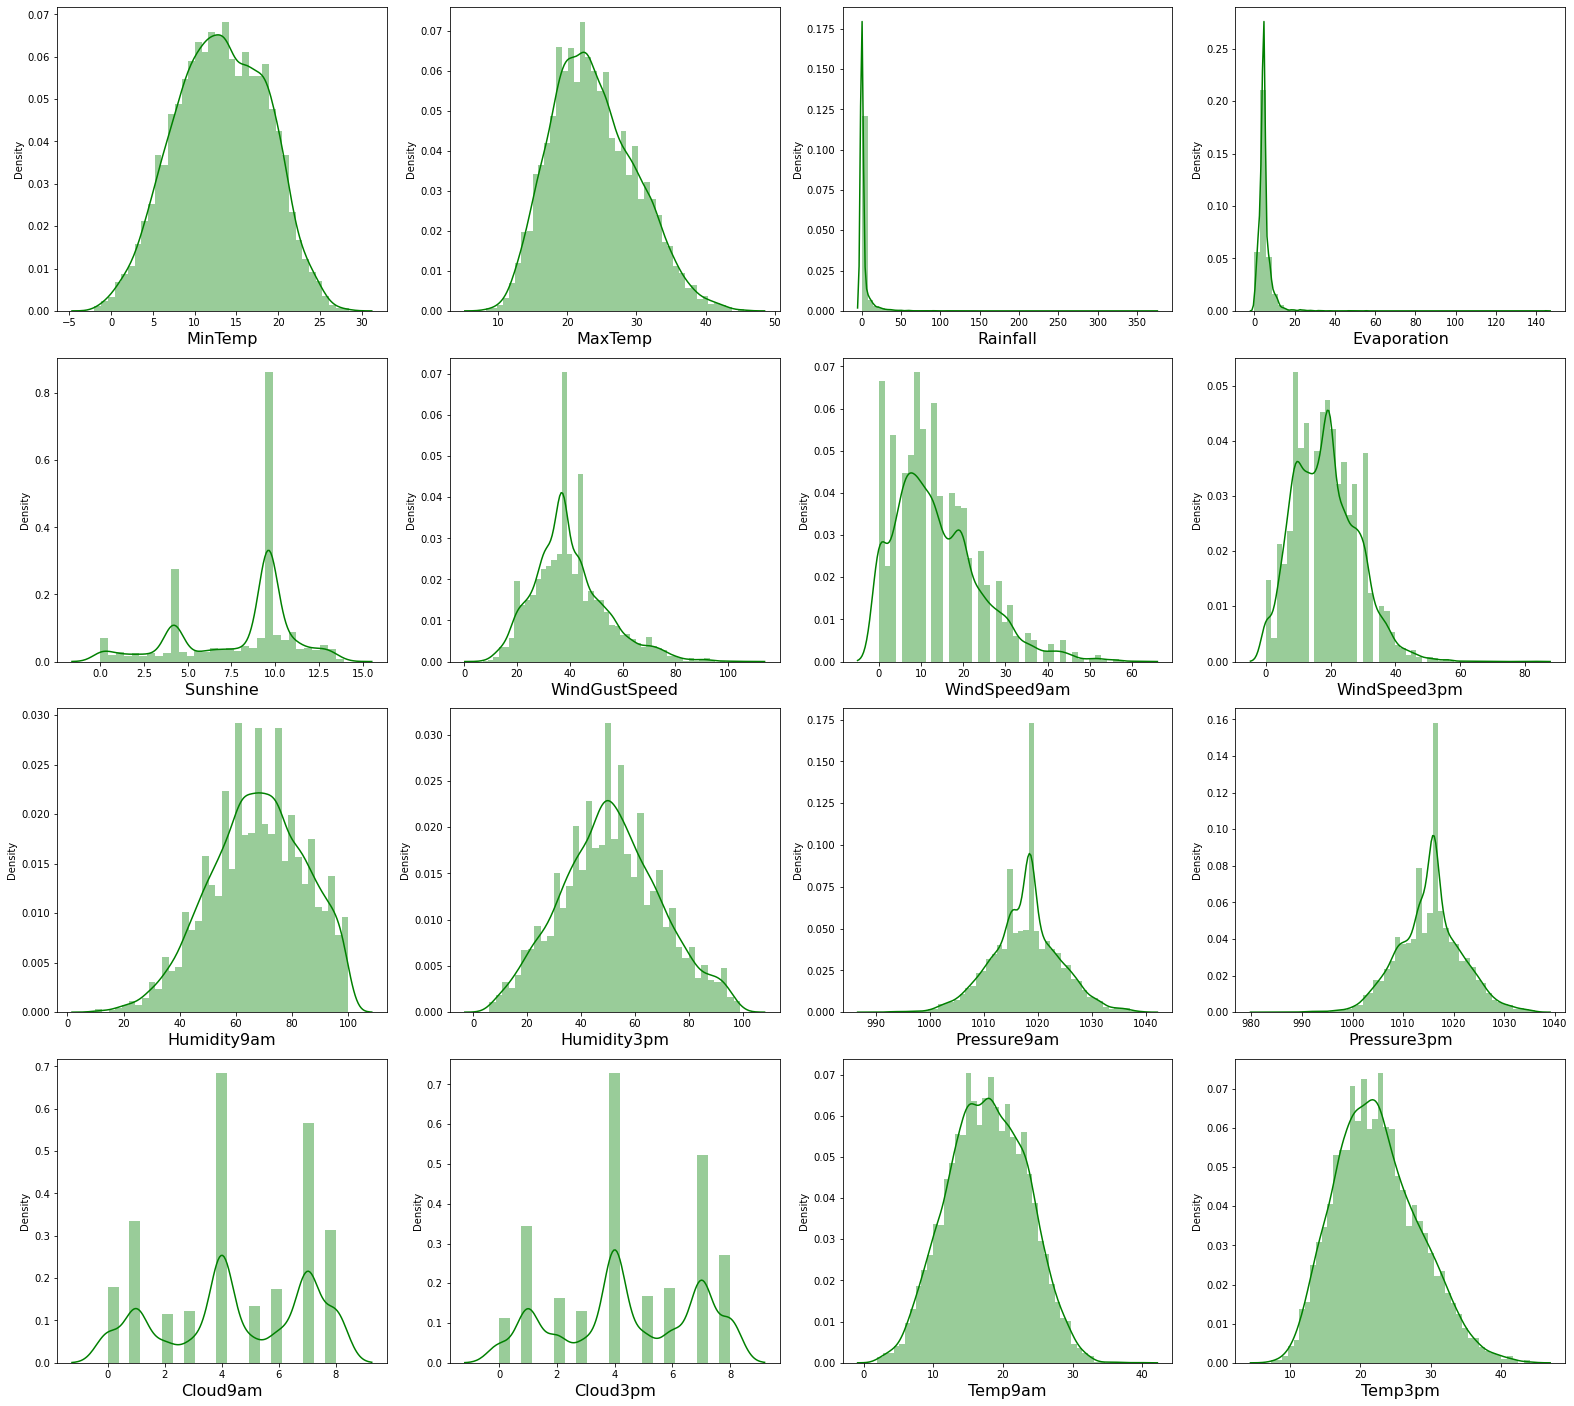

In [501]:
plt.figure(figsize=(22,24))
num=1

for columns in continous:
    
    if num<=20:
        ax=plt.subplot(5,4,num)
        sb.distplot(continous[columns],color='g')
        plt.xlabel(columns,fontsize=16)
        
    num+=1
plt.tight_layout()

for plotting is after filling the null values, whic gives clear view that we need to remove skewness from rainfall and evaporation which are highly skewed 

but for this first i will try power transform, to check how data behave 


In [502]:
from sklearn.preprocessing import power_transform

In [507]:
s=power_transform(continous)

In [508]:
skewed_conti=pd.DataFrame(s)


In [509]:
skewed_conti.columns=continous.columns

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,-0.630013,1.276108,-0.670670,-0.295324,-1.251429,2.383322,-0.535102,0.985261,-1.493658,-2.491299,-1.401135,-1.883238,0.982379,1.050334,0.104819,1.267046
1,0.054150,1.070864,-0.670670,-0.295324,-1.251429,-0.667338,0.486359,-1.347478,-1.172814,-1.640315,-0.944187,-1.066035,0.982379,1.050334,0.476566,1.068911
2,0.513327,-0.275557,1.450843,-0.295324,-1.251429,-0.580065,0.312646,-0.478271,1.298141,2.069435,-1.149241,-1.787219,1.375935,1.458501,-0.322554,-0.909165
3,0.513327,-0.841061,1.852496,-0.295324,-1.251429,1.443135,1.297458,0.985261,0.468399,2.167516,-3.675185,-3.574177,1.375935,1.458501,-0.055113,-1.153654
4,0.182945,-0.416162,-0.670670,-0.295324,-1.251429,-1.447998,-0.073140,-0.949941,0.038165,1.623598,-0.881022,-0.793110,1.375935,-1.461774,-0.090706,-0.694180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8074,-1.794801,-0.258221,-0.670670,0.133869,0.453467,-0.580065,0.312646,-0.478271,-0.554356,-1.337056,1.109615,0.946869,-0.201978,-0.188614,-1.497142,-0.180971
8075,-1.928608,0.012335,-0.670670,0.133869,0.453467,-0.580065,0.127050,-0.707436,-1.007865,-1.517830,1.093561,0.801468,-0.201978,-0.188614,-1.369181,0.076566
8076,-1.775739,0.318283,-0.670670,0.133869,0.453467,-1.447998,0.127050,-0.949941,-0.726668,-1.702207,0.917103,0.607715,-0.201978,-0.188614,-1.223436,0.419707
8077,-1.434531,0.564390,-0.670670,0.133869,0.453467,-0.092792,-0.291842,-0.949941,-0.896308,-1.517830,0.517000,0.236717,-0.201978,-0.188614,-0.933392,0.669019


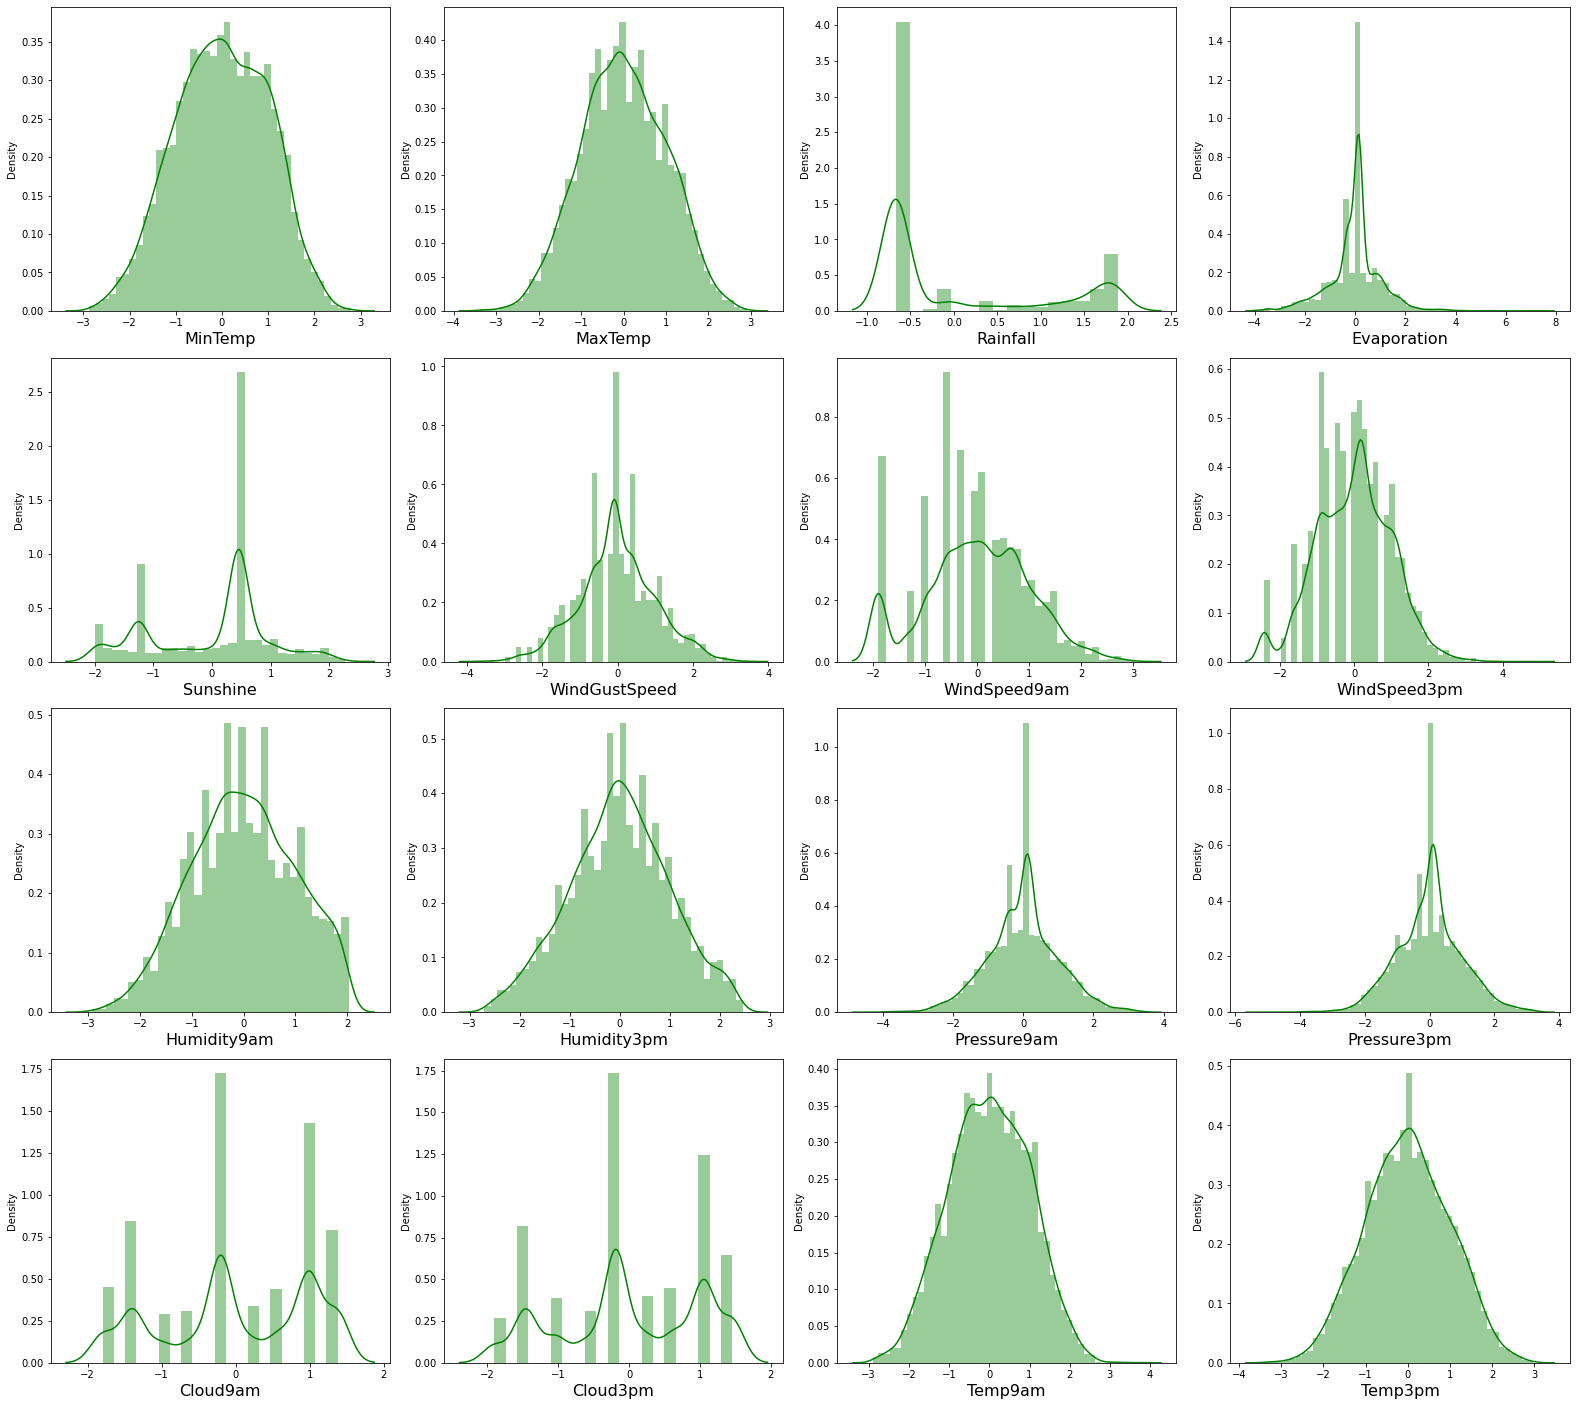

In [511]:
plt.figure(figsize=(22,24))
num=1

for columns in skewed_conti:
    
    if num<=20:
        ax=plt.subplot(5,4,num)
        sb.distplot(skewed_conti[columns],color='g')
        plt.xlabel(columns,fontsize=16)
        
    num+=1
plt.tight_layout()

yes, its working for skewness, behave as almost as standared normal distribution ,

now i am taking this skwead values for removing outliers 

# Removing outliers 

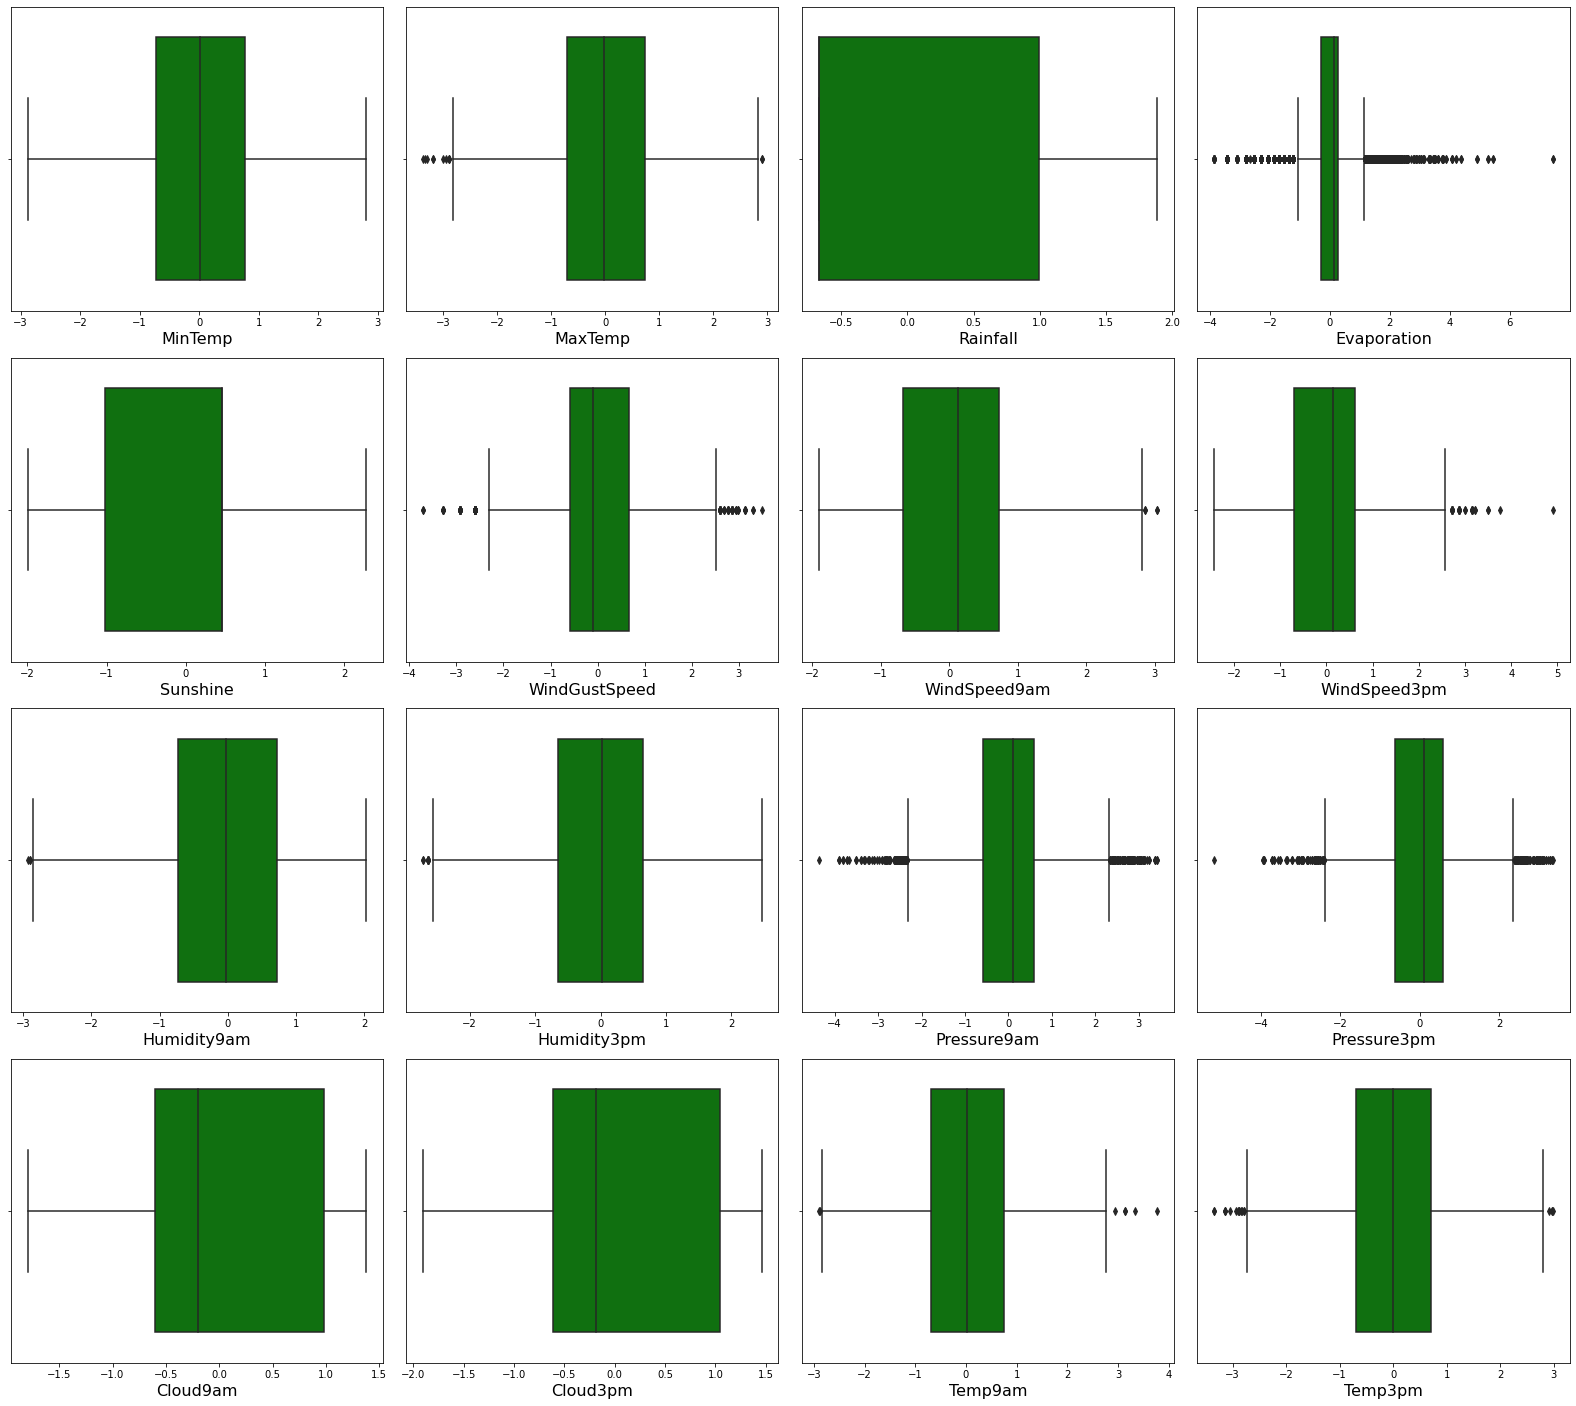

In [512]:
plt.figure(figsize=(22,24))
num=1

for columns in skewed_conti:
    
    if num<=20:
        ax=plt.subplot(5,4,num)
        sb.boxplot(skewed_conti[columns],color='g')
        plt.xlabel(columns,fontsize=16)
        
    num+=1
plt.tight_layout()

## above plotted graph are before using the zscore

In [745]:
from scipy.stats import zscore


In [746]:
z=np.abs(zscore(skewed_conti))
z


array([[0.63001317, 1.27610806, 0.67067024, ..., 1.05033359, 0.10481945,
        1.2670464 ],
       [0.05415018, 1.07086428, 0.67067024, ..., 1.05033359, 0.47656596,
        1.06891101],
       [0.51332662, 0.27555688, 1.45084313, ..., 1.45850086, 0.32255444,
        0.90916493],
       ...,
       [1.77573894, 0.31828291, 0.67067024, ..., 0.18861402, 1.22343605,
        0.41970688],
       [1.43453107, 0.56439019, 0.67067024, ..., 0.18861402, 0.93339205,
        0.6690192 ],
       [0.98399574, 0.57944763, 0.67067024, ..., 1.03178893, 0.46567309,
        0.65372146]])

In [747]:
print(np.where(z>3))

(array([   3,    3,    7,   15,   31,   31,   45,   45,   67,   83,  108,
        108,  122,  145,  145,  165,  243,  361,  366,  492,  552,  683,
        706,  713,  723,  735,  736,  741,  758,  765,  767,  777,  914,
        921,  931,  943,  944,  949,  966,  973,  975,  985, 1109, 1109,
       1117, 1132, 1138, 1153, 1187, 1187, 1200, 1200, 1228, 1228, 1254,
       1266, 1274, 1274, 1290, 1290, 1298, 1313, 1319, 1334, 1368, 1368,
       1381, 1381, 1409, 1409, 1435, 1447, 1455, 1455, 1590, 1593, 1618,
       1623, 1630, 1648, 1749, 1750, 1754, 1799, 1799, 1812, 1812, 1884,
       1888, 2083, 2083, 2364, 2364, 2365, 2369, 2369, 2370, 2391, 2936,
       2949, 2965, 2975, 3143, 3163, 3334, 3445, 3556, 3655, 3675, 3691,
       3920, 3942, 3946, 3947, 4016, 4026, 4034, 4040, 4046, 4051, 4055,
       4065, 4073, 4082, 4088, 4095, 4101, 4109, 4115, 4129, 4185, 4185,
       4186, 4190, 4214, 4215, 4217, 4244, 4257, 4262, 4269, 4294, 4303,
       4308, 4310, 4314, 4329, 4348, 4435, 4435, 4

In [748]:
len(np.where(z>3)[0])
clean_conti=skewed_conti[(z<3).all(axis=1)]
clean_conti

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,-0.630013,1.276108,-0.670670,-0.295324,-1.251429,2.383322,-0.535102,0.985261,-1.493658,-2.491299,-1.401135,-1.883238,0.982379,1.050334,0.104819,1.267046
1,0.054150,1.070864,-0.670670,-0.295324,-1.251429,-0.667338,0.486359,-1.347478,-1.172814,-1.640315,-0.944187,-1.066035,0.982379,1.050334,0.476566,1.068911
2,0.513327,-0.275557,1.450843,-0.295324,-1.251429,-0.580065,0.312646,-0.478271,1.298141,2.069435,-1.149241,-1.787219,1.375935,1.458501,-0.322554,-0.909165
4,0.182945,-0.416162,-0.670670,-0.295324,-1.251429,-1.447998,-0.073140,-0.949941,0.038165,1.623598,-0.881022,-0.793110,1.375935,-1.461774,-0.090706,-0.694180
5,0.072561,-0.070874,1.856109,-0.295324,-1.251429,1.550849,-0.668869,0.249107,0.719587,0.758667,-1.887669,-2.107155,1.375935,-1.461774,0.051551,-0.076623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8074,-1.794801,-0.258221,-0.670670,0.133869,0.453467,-0.580065,0.312646,-0.478271,-0.554356,-1.337056,1.109615,0.946869,-0.201978,-0.188614,-1.497142,-0.180971
8075,-1.928608,0.012335,-0.670670,0.133869,0.453467,-0.580065,0.127050,-0.707436,-1.007865,-1.517830,1.093561,0.801468,-0.201978,-0.188614,-1.369181,0.076566
8076,-1.775739,0.318283,-0.670670,0.133869,0.453467,-1.447998,0.127050,-0.949941,-0.726668,-1.702207,0.917103,0.607715,-0.201978,-0.188614,-1.223436,0.419707
8077,-1.434531,0.564390,-0.670670,0.133869,0.453467,-0.092792,-0.291842,-0.949941,-0.896308,-1.517830,0.517000,0.236717,-0.201978,-0.188614,-0.933392,0.669019


In [784]:
c=skewed_conti[(z<3).all(axis=1)].index

In [787]:
catego.drop(index=c,axis=0,inplace=True)

## Let's check how outliers behave 

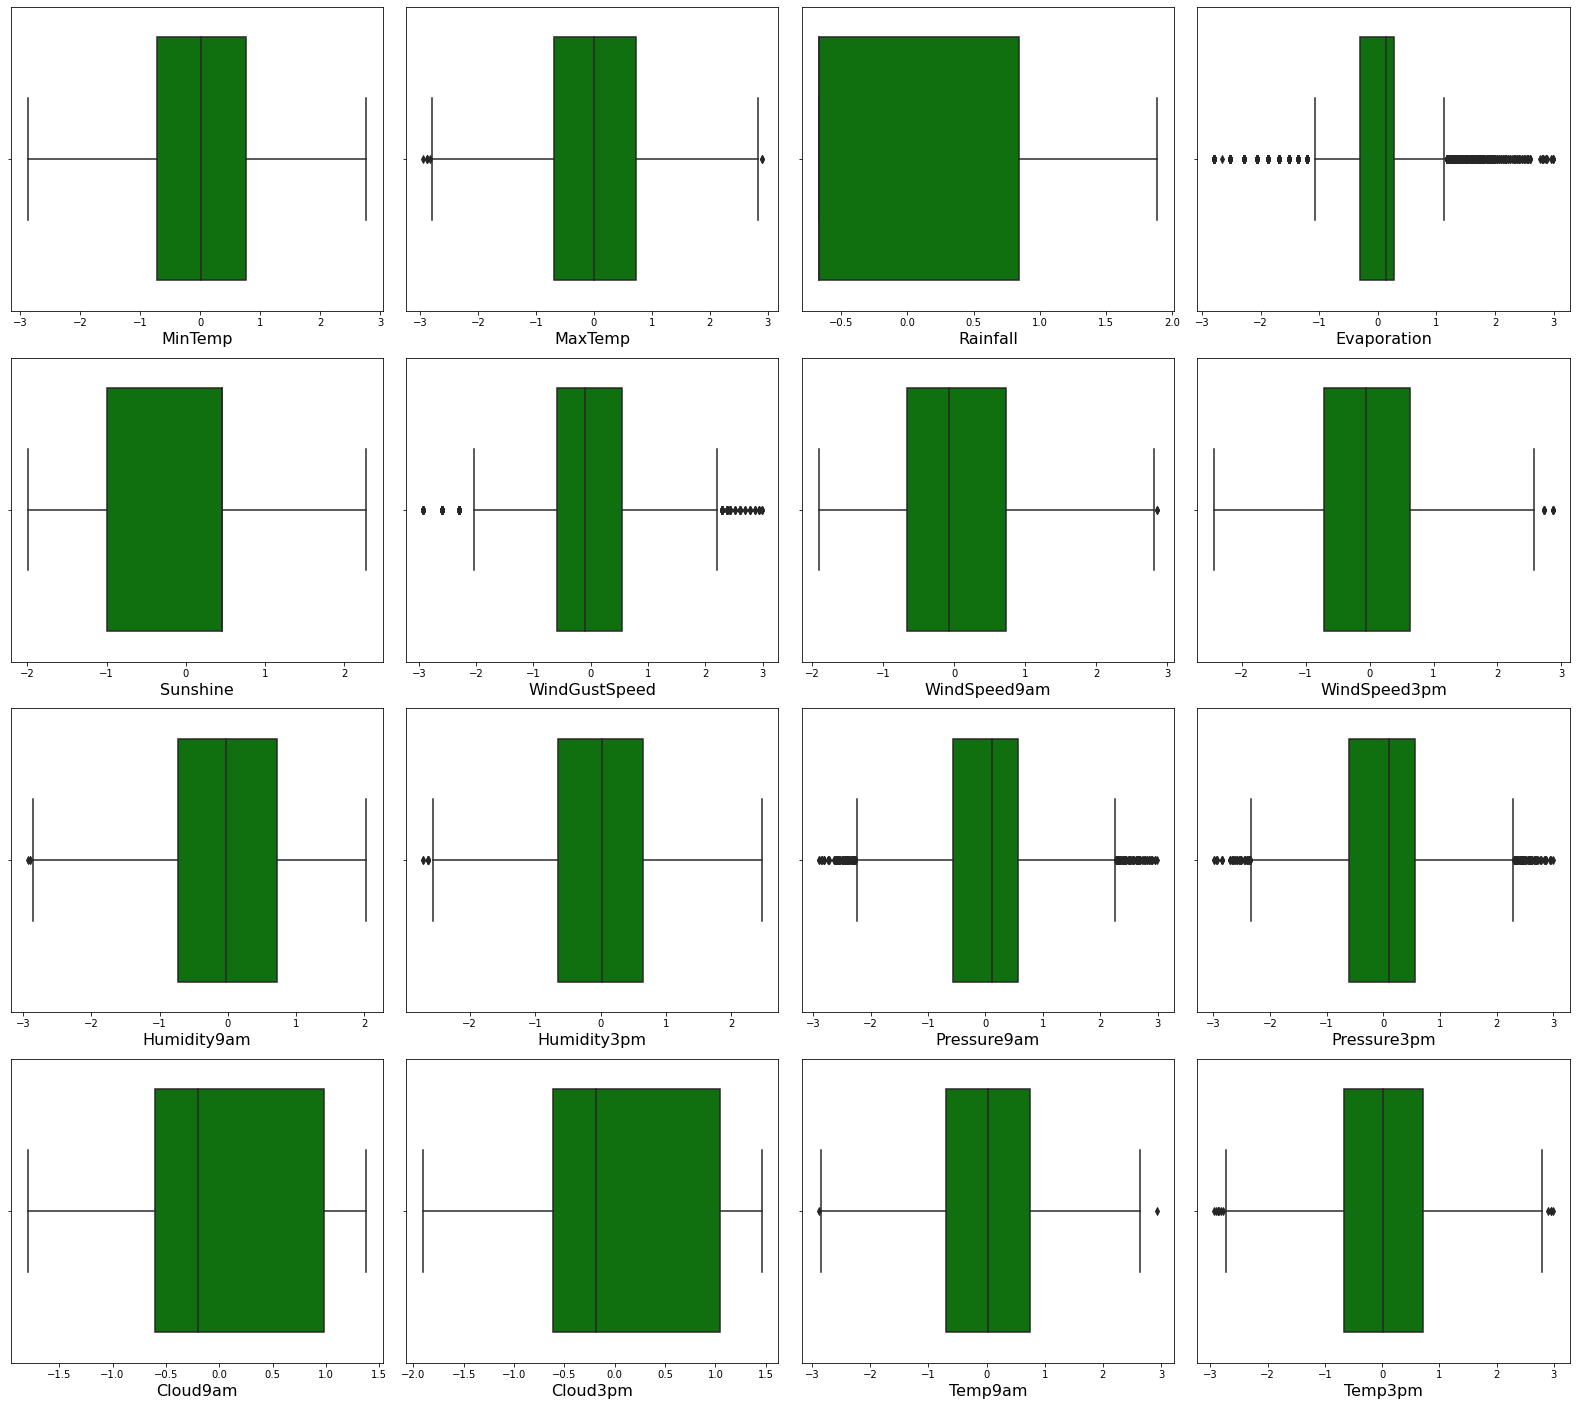

In [788]:
plt.figure(figsize=(22,24))
num=1

for columns in clean_conti:
    
    if num<=20:
        ax=plt.subplot(5,4,num)
        sb.boxplot(clean_conti[columns],color='g')
        plt.xlabel(columns,fontsize=16)
        
    num+=1
plt.tight_layout()

Here we see that there are still some of outliers but i can say safely it is useable for prediction.

outliers are in continous form and that will be okay.

if i remove all the outliers it may baised prediction, and we donot have that mach data, so we do not afford loosing data.

## concating the columns for training and model building 

In [751]:
clean_conti.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm'],
      dtype='object')

In [593]:
# I am not using the data which is clean.



In [790]:
clean_conti.reset_index(inplace=True)
clean_conti

,level_0,index,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,0,0,-0.630013,1.276108,-0.670670,-0.295324,-1.251429,2.383322,-0.535102,0.985261,-1.493658,-2.491299,-1.401135,-1.883238,0.982379,1.050334,0.104819,1.267046
1,1,1,0.054150,1.070864,-0.670670,-0.295324,-1.251429,-0.667338,0.486359,-1.347478,-1.172814,-1.640315,-0.944187,-1.066035,0.982379,1.050334,0.476566,1.068911
2,2,2,0.513327,-0.275557,1.450843,-0.295324,-1.251429,-0.580065,0.312646,-0.478271,1.298141,2.069435,-1.149241,-1.787219,1.375935,1.458501,-0.322554,-0.909165
3,3,3,0.182945,-0.416162,-0.670670,-0.295324,-1.251429,-1.447998,-0.073140,-0.949941,0.038165,1.623598,-0.881022,-0.793110,1.375935,-1.461774,-0.090706,-0.694180
4,4,4,0.072561,-0.070874,1.856109,-0.295324,-1.251429,1.550849,-0.668869,0.249107,0.719587,0.758667,-1.887669,-2.107155,1.375935,-1.461774,0.051551,-0.076623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7845,7845,7845,-1.794801,-0.258221,-0.670670,0.133869,0.453467,-0.580065,0.312646,-0.478271,-0.554356,-1.337056,1.109615,0.946869,-0.201978,-0.188614,-1.497142,-0.180971
7846,7846,7846,-1.928608,0.012335,-0.670670,0.133869,0.453467,-0.580065,0.127050,-0.707436,-1.007865,-1.517830,1.093561,0.801468,-0.201978,-0.188614,-1.369181,0.076566
7847,7847,7847,-1.775739,0.318283,-0.670670,0.133869,0.453467,-1.447998,0.127050,-0.949941,-0.726668,-1.702207,0.917103,0.607715,-0.201978,-0.188614,-1.223436,0.419707
7848,7848,7848,-1.434531,0.564390,-0.670670,0.133869,0.453467,-0.092792,-0.291842,-0.949941,-0.896308,-1.517830,0.517000,0.236717,-0.201978,-0.188614,-0.933392,0.669019


In [791]:
clean_conti.drop('index',axis=1,inplace=True)

In [793]:
catego=ddf[['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm',
       'RainToday', 'RainTomorrow','year','month','day']]

In [794]:
catego

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow,year,month,day
0,1,6,9,7,0,1,2008,12,9
1,1,3,10,2,0,1,2008,12,11
2,1,5,4,1,1,1,2008,12,12
3,1,13,6,6,1,1,2008,12,13
4,1,1,11,0,0,1,2008,12,17
...,...,...,...,...,...,...,...,...,...
8074,9,0,2,0,0,0,2017,6,20
8075,9,0,9,1,0,0,2017,6,21
8076,9,6,9,3,0,0,2017,6,22
8077,9,3,9,14,0,0,2017,6,23


In [818]:
delt=np.where(z>3)[0]
delt

array([   3,    3,    7,   15,   31,   31,   45,   45,   67,   83,  108,
        108,  122,  145,  145,  165,  243,  361,  366,  492,  552,  683,
        706,  713,  723,  735,  736,  741,  758,  765,  767,  777,  914,
        921,  931,  943,  944,  949,  966,  973,  975,  985, 1109, 1109,
       1117, 1132, 1138, 1153, 1187, 1187, 1200, 1200, 1228, 1228, 1254,
       1266, 1274, 1274, 1290, 1290, 1298, 1313, 1319, 1334, 1368, 1368,
       1381, 1381, 1409, 1409, 1435, 1447, 1455, 1455, 1590, 1593, 1618,
       1623, 1630, 1648, 1749, 1750, 1754, 1799, 1799, 1812, 1812, 1884,
       1888, 2083, 2083, 2364, 2364, 2365, 2369, 2369, 2370, 2391, 2936,
       2949, 2965, 2975, 3143, 3163, 3334, 3445, 3556, 3655, 3675, 3691,
       3920, 3942, 3946, 3947, 4016, 4026, 4034, 4040, 4046, 4051, 4055,
       4065, 4073, 4082, 4088, 4095, 4101, 4109, 4115, 4129, 4185, 4185,
       4186, 4190, 4214, 4215, 4217, 4244, 4257, 4262, 4269, 4294, 4303,
       4308, 4310, 4314, 4329, 4348, 4435, 4435, 44

In [799]:
c=skewed_conti[(z<3).all(axis=1)].index
c

Int64Index([   0,    1,    2,    4,    5,    6,    8,    9,   10,   11,
            ...
            8069, 8070, 8071, 8072, 8073, 8074, 8075, 8076, 8077, 8078],
           dtype='int64', length=7850)

In [ ]:
catego.drop(index=delt,axis=0,inplace=True)


In [815]:

catego.drop(['level_0'],axis=1,inplace=True)

In [821]:

catego.shape,clean_conti.shape

((7850, 9), (7850, 17))

In [823]:
The_df=pd.concat([clean_conti,catego],axis=1,join='inner')

In [825]:
The_df.drop('level_0',axis=1,inplace=True)

In [827]:
The_df # now this data is ready for prediction 

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Temp3pm,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow,year,month,day
0,-0.630013,1.276108,-0.670670,-0.295324,-1.251429,2.383322,-0.535102,0.985261,-1.493658,-2.491299,...,1.267046,1,6,9,7,0,1,2008,12,9
1,0.054150,1.070864,-0.670670,-0.295324,-1.251429,-0.667338,0.486359,-1.347478,-1.172814,-1.640315,...,1.068911,1,3,10,2,0,1,2008,12,11
2,0.513327,-0.275557,1.450843,-0.295324,-1.251429,-0.580065,0.312646,-0.478271,1.298141,2.069435,...,-0.909165,1,5,4,1,1,1,2008,12,12
3,0.182945,-0.416162,-0.670670,-0.295324,-1.251429,-1.447998,-0.073140,-0.949941,0.038165,1.623598,...,-0.694180,1,1,11,0,0,1,2008,12,17
4,0.072561,-0.070874,1.856109,-0.295324,-1.251429,1.550849,-0.668869,0.249107,0.719587,0.758667,...,-0.076623,1,13,3,14,1,1,2008,12,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7845,-1.794801,-0.258221,-0.670670,0.133869,0.453467,-0.580065,0.312646,-0.478271,-0.554356,-1.337056,...,-0.180971,9,0,2,0,0,0,2017,6,20
7846,-1.928608,0.012335,-0.670670,0.133869,0.453467,-0.580065,0.127050,-0.707436,-1.007865,-1.517830,...,0.076566,9,0,9,1,0,0,2017,6,21
7847,-1.775739,0.318283,-0.670670,0.133869,0.453467,-1.447998,0.127050,-0.949941,-0.726668,-1.702207,...,0.419707,9,6,9,3,0,0,2017,6,22
7848,-1.434531,0.564390,-0.670670,0.133869,0.453467,-0.092792,-0.291842,-0.949941,-0.896308,-1.517830,...,0.669019,9,3,9,14,0,0,2017,6,23


# Checking VIF

In [829]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [830]:
X=The_df.drop('RainTomorrow',axis=1)


In [831]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
vif_data.sort_values(by='VIF',ascending=False)


,feature,VIF
15,Temp3pm,32.943283
1,MaxTemp,25.897779
21,year,22.886895
10,Pressure9am,20.137296
11,Pressure3pm,18.934248
14,Temp9am,17.214896
20,RainToday,11.692393
2,Rainfall,9.706458
0,MinTemp,8.674376
19,WindDir3pm,6.124558


# Feature selection :-

In [834]:
from sklearn.feature_selection import SelectKBest,f_classif

In [835]:
x=The_df.drop(['RainTomorrow'],axis=1)
y=The_df['RainTomorrow']

In [836]:
feature_selector=SelectKBest(score_func=f_classif,k=10)
fit=feature_selector.fit(x,y)

In [837]:
df_score =pd.DataFrame(fit.scores_)
df_score
df_columns=pd.DataFrame(x.columns)
feature_score=pd.concat([df_columns,df_score],axis=1)
feature_score.columns=['features','score']

In [838]:
feature_score

,features,score
0,MinTemp,84.818353
1,MaxTemp,190.736255
2,Rainfall,1069.368597
3,Evaporation,257.437822
4,Sunshine,5457.666625
5,WindGustSpeed,322.615524
6,WindSpeed9am,28.868183
7,WindSpeed3pm,7.173876
8,Humidity9am,722.646448
9,Humidity3pm,2106.800075


### Dropping the columns maxtemp showing multicolinearity problem

In [840]:
x.drop('MaxTemp',axis=1,inplace=True)

In [843]:
x.head(3)

,MinTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,...,Temp9am,Temp3pm,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,year,month,day
0,-0.630013,-0.670670,-0.295324,-1.251429,2.383322,-0.535102,0.985261,-1.493658,-2.491299,-1.401135,...,0.104819,1.267046,1,6,9,7,0,2008,12,9
1,0.054150,-0.670670,-0.295324,-1.251429,-0.667338,0.486359,-1.347478,-1.172814,-1.640315,-0.944187,...,0.476566,1.068911,1,3,10,2,0,2008,12,11
2,0.513327,1.450843,-0.295324,-1.251429,-0.580065,0.312646,-0.478271,1.298141,2.069435,-1.149241,...,-0.322554,-0.909165,1,5,4,1,1,2008,12,12


In [845]:
y.value_counts() ## unbalance dataset is here


0    5998
1    1852
Name: RainTomorrow, dtype: int64

## scaling Dataset

In [847]:
from sklearn.preprocessing import StandardScaler

In [850]:
st=StandardScaler()
x_scaled=st.fit_transform(x)

## Balancing Dataset

In [852]:
y.value_counts(normalize=True)*100

0    76.407643
1    23.592357
Name: RainTomorrow, dtype: float64

In [853]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()


In [855]:
n_x,n_y=sm.fit_resample(x_scaled,y)

## Training Data

In [857]:
from sklearn.model_selection import train_test_split

In [858]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,f1_score,classification_report,confusion_matrix

In [859]:
max_accu=0
max_RS=0

for i in range(0,200):
    x_train,x_test,y_train,y_test= train_test_split(n_x,n_y,random_state=i,test_size=.20)
    lr= LogisticRegression()
    lr.fit(x_train,y_train)
    pred= lr.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>max_accu:
        max_accu=acc
        max_RS=i
print("Best accuracy is ",max_accu,"on Random State =",max_RS)

Best accuracy is  0.9116666666666666 on Random State = 21


In [860]:
x_train,x_test,y_train,y_test= train_test_split(n_x,n_y,random_state=21,test_size=.20)

In [861]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.neural_network import MLPClassifier

In [862]:
lr_model=LogisticRegression()
dt_model=DecisionTreeClassifier()
svc_model=SVC()
knn_model=KNeighborsClassifier()
rd_model=RandomForestClassifier()
xgb_model=XGBClassifier()
sdg_model=SGDClassifier()
bag_model=BaggingClassifier()
ada_model=AdaBoostClassifier()
gd_model=GradientBoostingClassifier()
et_model=ExtraTreeClassifier()
nural_model=MLPClassifier()

In [863]:
models=[lr_model,dt_model,svc_model,knn_model,rd_model,xgb_model,sdg_model,bag_model,ada_model,gd_model,et_model,nural_model]

In [864]:
for m in models:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predict=m.predict(x_test)
    print('Accuracy Score of ',m, 'is', accuracy_score(y_test,predict))
    print("F1 Score", f1_score(y_test,predict))
    print('Confusion Matrix of ',m,' is \n', confusion_matrix(y_test,predict))
    print('Classification_report',classification_report(y_test,predict))
    print('*******************************************')

Accuracy Score of  LogisticRegression() is 0.9116666666666666
F1 Score 0.9131147540983605
Confusion Matrix of  LogisticRegression()  is 
 [[1074  113]
 [  99 1114]]
Classification_report               precision    recall  f1-score   support

           0       0.92      0.90      0.91      1187
           1       0.91      0.92      0.91      1213

    accuracy                           0.91      2400
   macro avg       0.91      0.91      0.91      2400
weighted avg       0.91      0.91      0.91      2400

*******************************************
Accuracy Score of  DecisionTreeClassifier() is 0.9391666666666667
F1 Score 0.9402129402129402
Confusion Matrix of  DecisionTreeClassifier()  is 
 [[1106   81]
 [  65 1148]]
Classification_report               precision    recall  f1-score   support

           0       0.94      0.93      0.94      1187
           1       0.93      0.95      0.94      1213

    accuracy                           0.94      2400
   macro avg       0.94      

# Cross validation

In [866]:
from sklearn.model_selection import cross_val_score

In [868]:
for i in models:
    print('Accuracy_Score of ',i, 'is', accuracy_score(y_test,i.predict(x_test)))
    print("cross Validation accuracy score of ",i ," is ",cross_val_score(i,n_x,n_y,cv=8, scoring='accuracy').mean())
    print('@'*50)

Accuracy_Score of  LogisticRegression() is 0.9116666666666666
cross Validation accuracy score of  LogisticRegression()  is  0.8814545252390482
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
Accuracy_Score of  DecisionTreeClassifier() is 0.9391666666666667
cross Validation accuracy score of  DecisionTreeClassifier()  is  0.9127980876139649
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
Accuracy_Score of  SVC() is 0.93875
cross Validation accuracy score of  SVC()  is  0.9038783077607294
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
Accuracy_Score of  KNeighborsClassifier() is 0.9258333333333333
cross Validation accuracy score of  KNeighborsClassifier()  is  0.8706205247943073
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
Accuracy_Score of  RandomForestClassifier() is 0.9695833333333334
cross Validation accuracy score of  RandomForestClassifier()  is  0.9481470424727596
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
Accuracy_Score of  XGBClassifier(base_score=0.5, bo

In [870]:
0.9695833333333334 - 0.9481470424727596

0.021436290860573748

Here i am selection random forest 

- Accuracy_Score of  RandomForestClassifier() is 0.9695833333333334
- cross Validation accuracy score of  RandomForestClassifier()  is  0.9481470424727596

In here we see 0.02143 as per round figure 2.14 flucatuation .


# Hyperparameter Tuning

In [871]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

In [872]:
n_estimator= [200, 400, 600, 800, 1000]  
max_features= ['auto','sqrt','log2']  
max_depth=[10, 64, 104, 187, 212, 282, 378]  
min_samples_split= [1,2,3]  
min_samples_leaf= [1,3,4,6,7,9] 

In [874]:
parameter= {'n_estimators': n_estimator,
             'max_features':max_features,
             'max_depth':max_depth,
             'min_samples_split':min_samples_split,
             'min_samples_leaf':min_samples_leaf,
             }

In [875]:
random= RandomizedSearchCV(rd_model,param_distributions=parameter,cv=5,n_jobs=-1)
random.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [10, 64, 104, 187, 212,
                                                      282, 378],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 3, 4, 6, 7, 9],
                                        'min_samples_split': [1, 2, 3],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000]})

In [876]:
random.best_estimator_

RandomForestClassifier(max_depth=378, min_samples_leaf=3, n_estimators=200)

In [877]:
random.best_params_

{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 3,
 'max_features': 'sqrt',
 'max_depth': 378}

In [878]:
Rd_model=RandomForestClassifier( n_estimators = 200,
 min_samples_split = 2,
 min_samples_leaf = 3,
 max_features= 'auto',
 max_depth = 378)

Rd_model.fit(x_train,y_train)
Rd_model_predict=Rd_model.predict(x_test)

In [879]:
accuracy_score(y_test,Rd_model_predict)

0.9629166666666666

# Plot_roc_curve

In [883]:
from sklearn.metrics import roc_auc_score,roc_curve,plot_roc_curve

In [884]:
for m in models:
    m.fit(x_train,y_train)

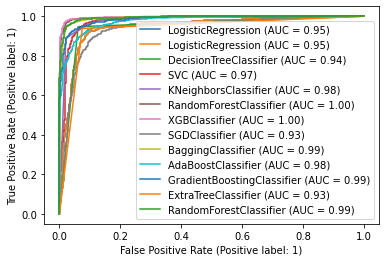

In [885]:
dist=plot_roc_curve(lr_model,x_test,y_test,)
plot_roc_curve(lr_model,x_test,y_test,ax=dist.ax_) ;
plot_roc_curve(dt_model,x_test,y_test,ax=dist.ax_) ;
plot_roc_curve(svc_model,x_test,y_test,ax=dist.ax_) ;
plot_roc_curve(knn_model,x_test,y_test,ax=dist.ax_) ;
plot_roc_curve(rd_model,x_test,y_test,ax=dist.ax_) ;
plot_roc_curve(xgb_model,x_test,y_test,ax=dist.ax_) ;
plot_roc_curve(sdg_model,x_test,y_test,ax=dist.ax_) ;
plot_roc_curve(bag_model,x_test,y_test,ax=dist.ax_) ;
plot_roc_curve(ada_model,x_test,y_test,ax=dist.ax_) ;
plot_roc_curve(gd_model,x_test,y_test,ax=dist.ax_) ;
plot_roc_curve(et_model,x_test,y_test,ax=dist.ax_) ;
plot_roc_curve(Rd_model,x_test,y_test,ax=dist.ax_);

RandomForestClassifier == (auc=1.00)

# Saving the model

In [887]:
import pickle
file_name='Rain Prediction – Weather forecasting'
with open(file_name,'wb') as file:
    pickle.dump(rd_model,file)